In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Privacy of Student Depression Data
A popular Kaggle dataset claims to have taken privacy into account. Let's test that with some of the privacy metrics we studied.

# The Data
Overview 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = "./student_depression_dataset.csv"

df = pd.read_csv(file_path)


display(df)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']


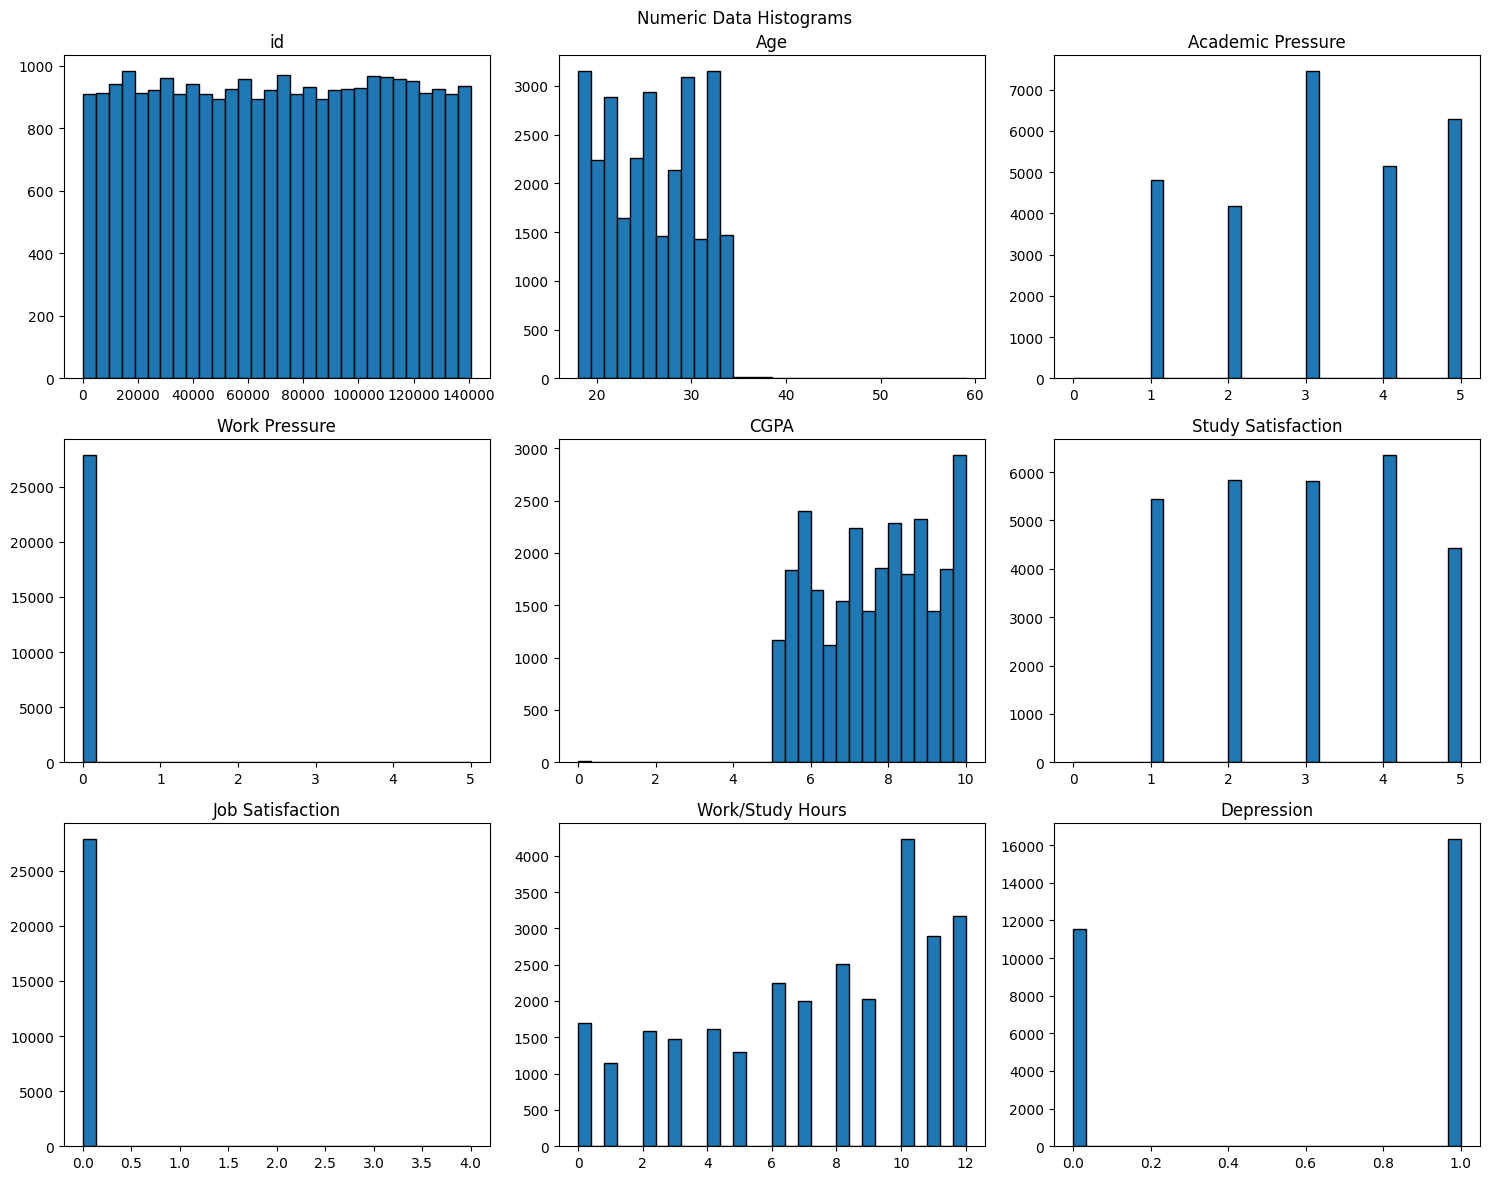

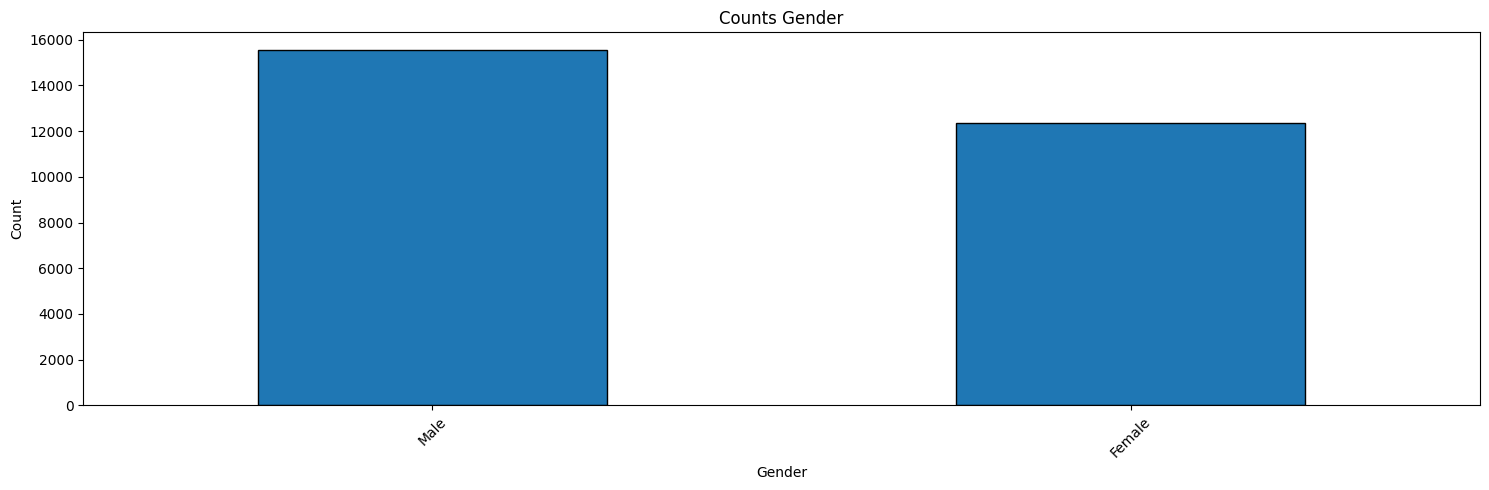

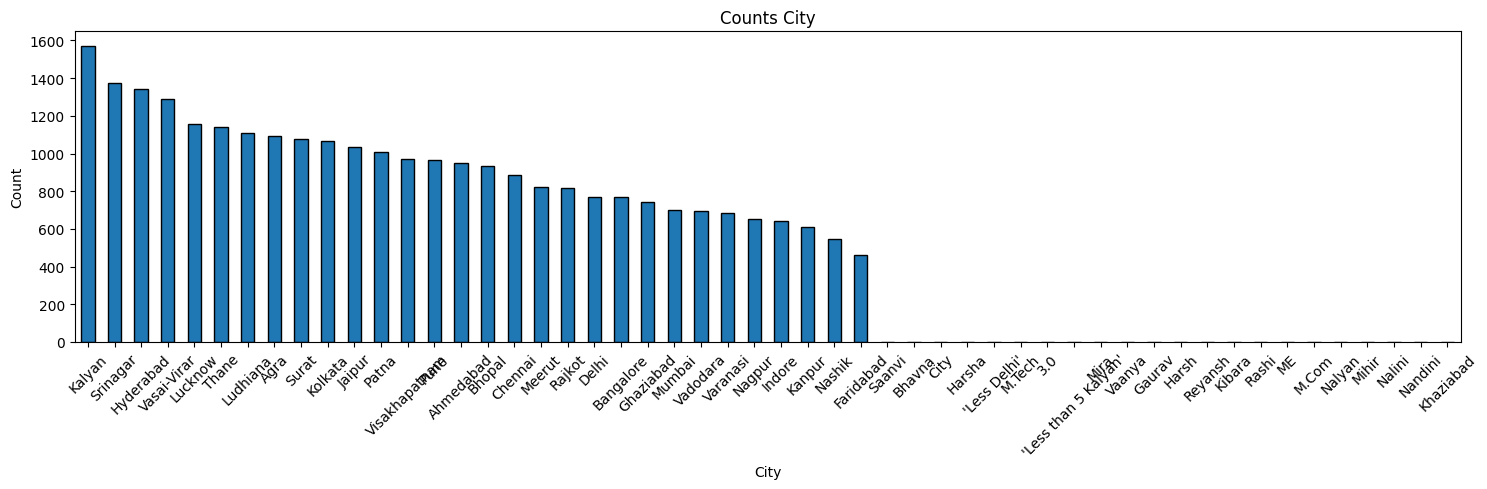

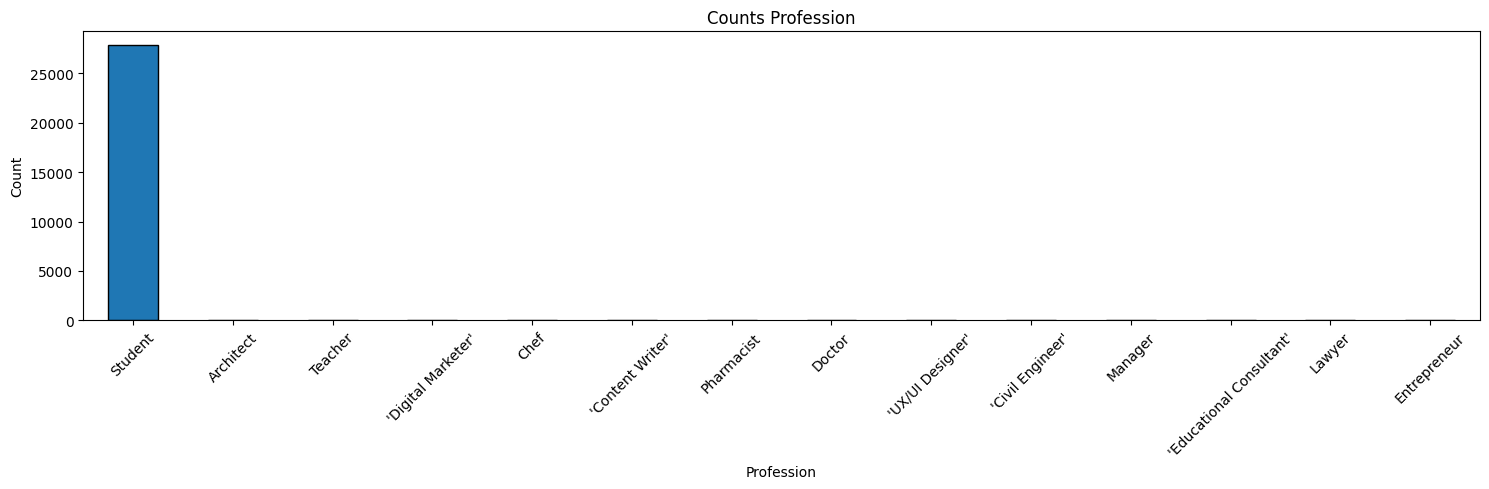

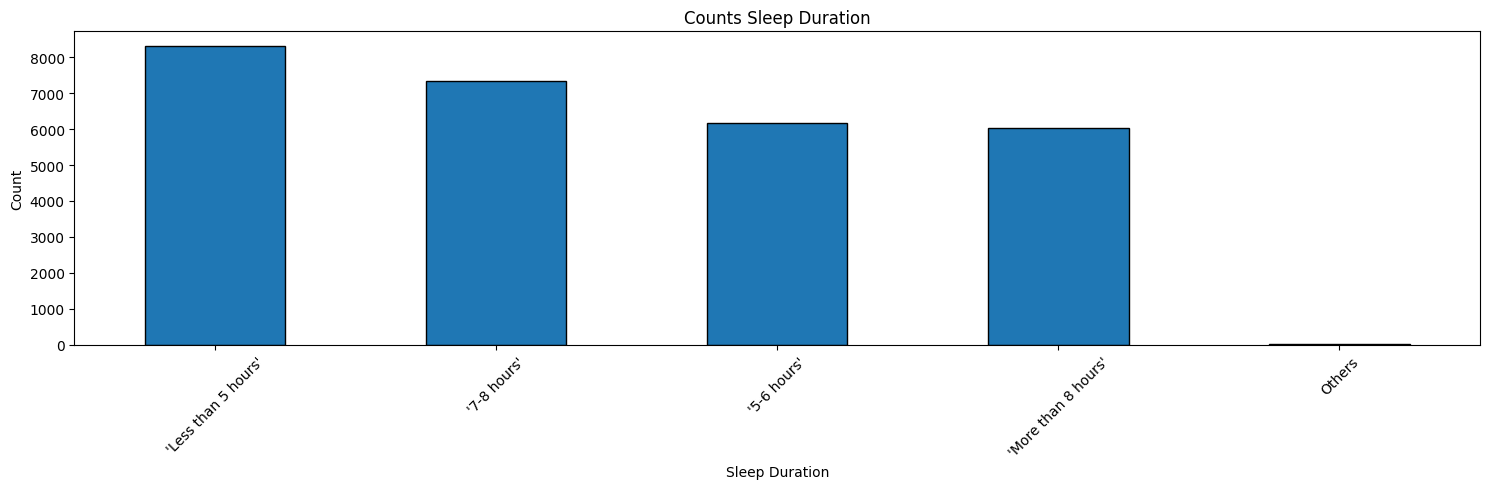

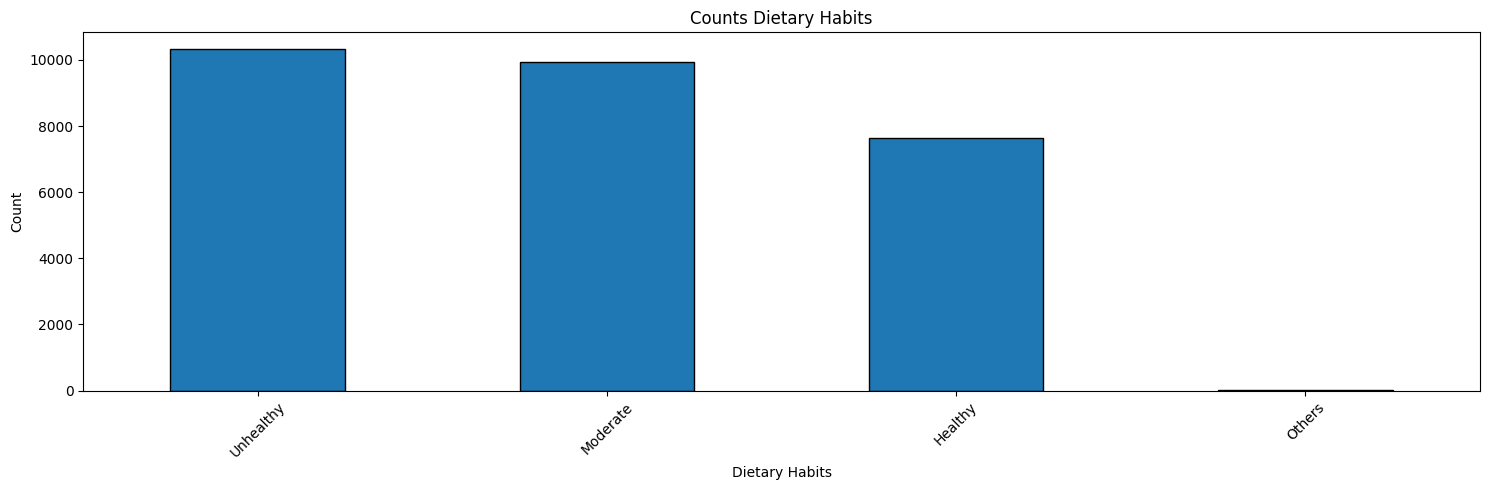

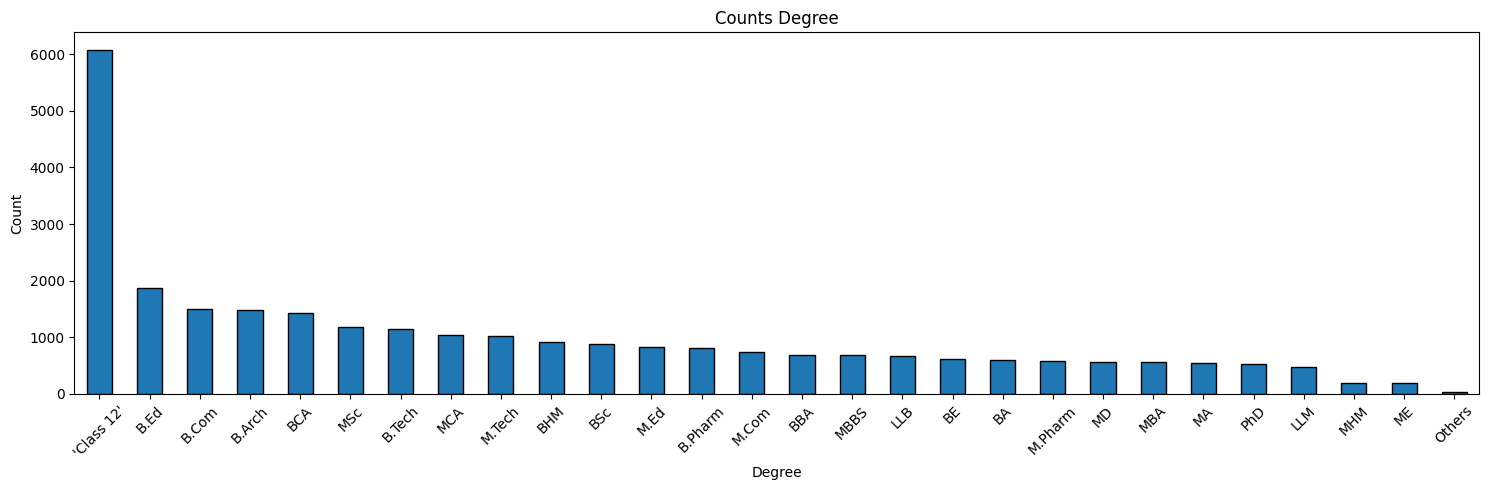

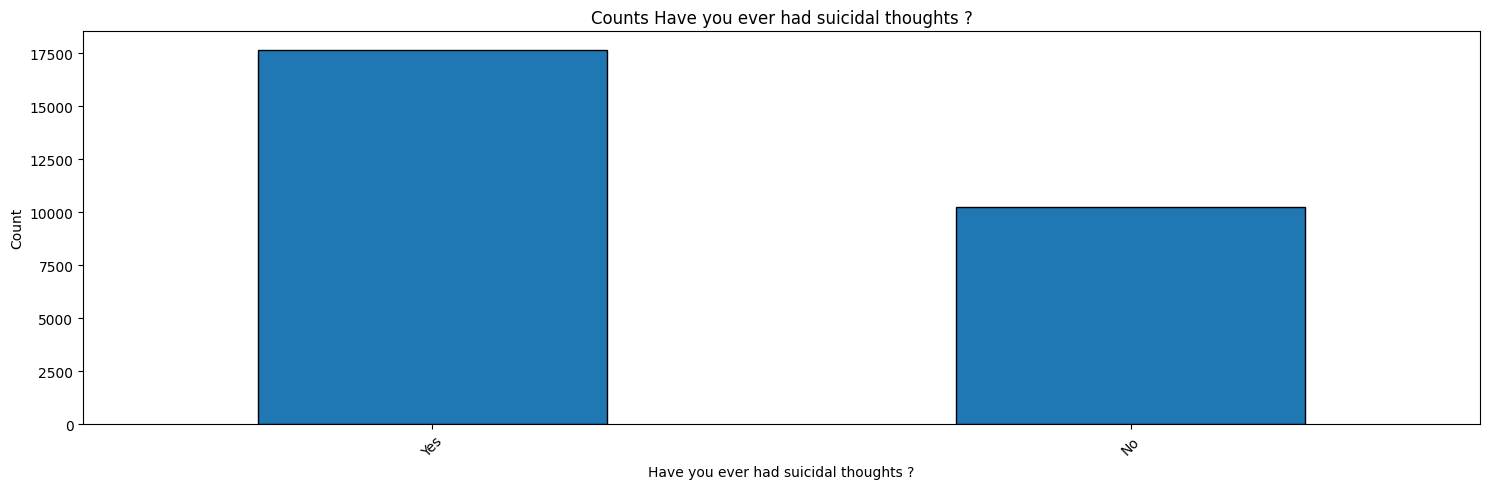

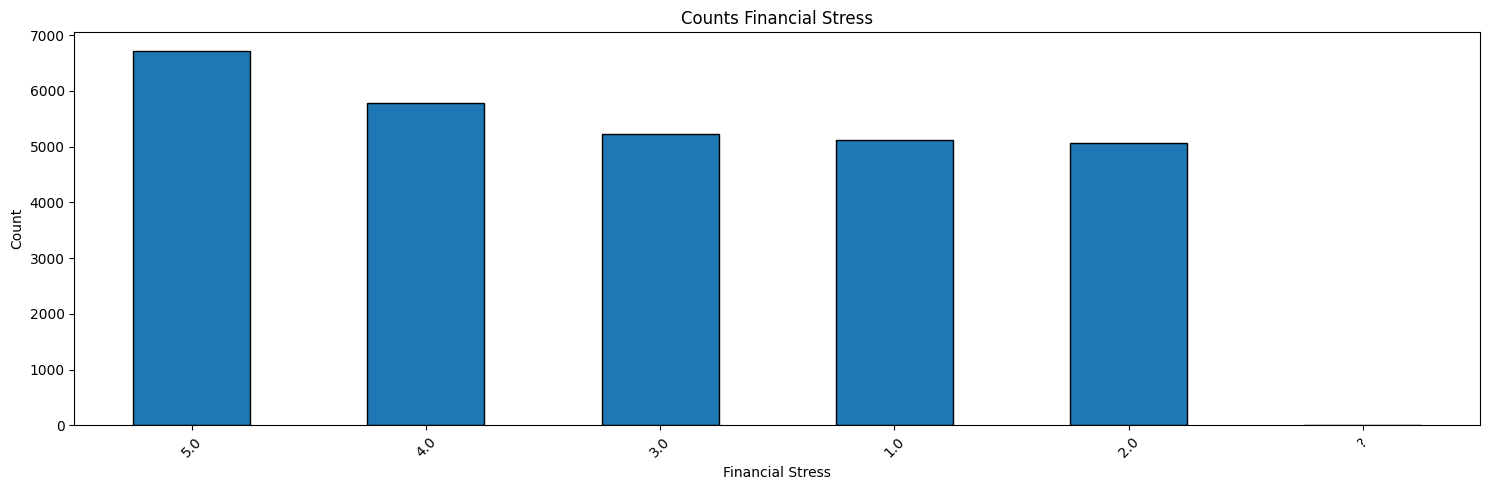

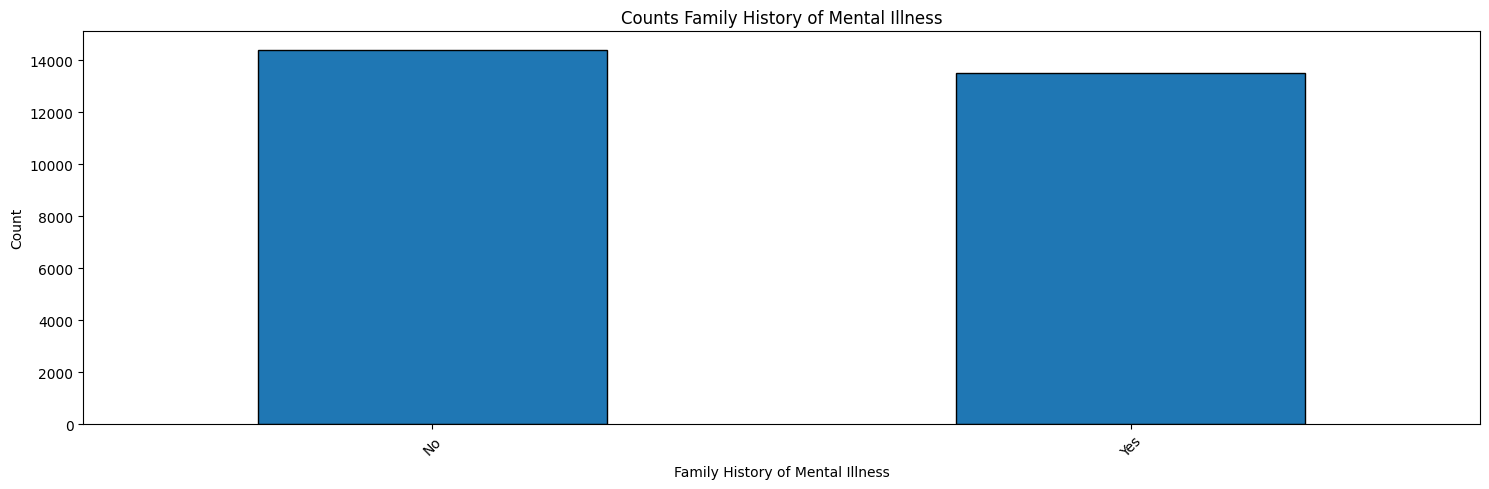

In [36]:
# Plot histograms for all numeric columns
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
#categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns


print(df['City'].unique())

# Plot numeric histograms
df[numeric_cols].hist(figsize=(15, 12), bins=30, edgecolor='black', grid=0)
plt.suptitle('Numeric Data Histograms')
plt.tight_layout()
plt.show()

# Plot bar charts for categorical columns (top 20 values only to avoid clutter)
for col in categorical_cols:
    plt.figure(figsize=(15, 5))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Counts {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Import functions we wrote

In [37]:
from finalPrivacyFuncs import (
  k_anonymity,
  Mondrian,
  Mondrian_choose_cut_first_split,
  Mondrian_choose_dim_highest_distinct,
  discernability_cost,

  distinct_l_diversity,
  entropy_l_diversity,
  Mondrian_l_diversity,
  Mondrian_choose_cut_first_split_l_diversity,
)

# $k$-Anonymity

In [38]:
qID = ['Gender', 'Age', 'City']

k, grouped = k_anonymity(df, qID)
print(k)
display(grouped)

1


,Gender,Age,City,count
0,Female,18.0,Agra,17
1,Female,18.0,Ahmedabad,21
2,Female,18.0,Bangalore,22
3,Female,18.0,Bhopal,20
4,Female,18.0,Chennai,30
...,...,...,...,...
1088,Male,43.0,Rajkot,1
1089,Male,46.0,Nashik,1
1090,Male,49.0,Nagpur,1
1091,Male,54.0,Agra,1


In [39]:
# In this dataset there are 71 rows that are unique identifiers

desired_k = 10

print('k', '# ECs')
for i in range(1, 10):
  print(i, grouped['count'].loc[grouped['count'] == i].count())

nonprivate_classes = grouped['count'].loc[grouped['count'] < desired_k].count()
print(f'There are { nonprivate_classes } equivalency classes with k < 10.')

# Join dataset so each row has the k-value of its equivalency class

df_with_counts = df.merge(grouped, how='right')
nonprivate_rows = df_with_counts['count'].loc[df_with_counts['count'] < desired_k].count()
print(f'This is {nonprivate_rows} individuals with >10% risk of identity disclosure, {nonprivate_rows * 100 / len(df):2.2f}% of the table.')
# display(df_with_counts)

k # ECs
1 71
2 2
3 1
4 5
5 4
6 6
7 12
8 19
9 17
There are 137 equivalency classes with k < 10.
This is 543 individuals with >10% risk of identity disclosure, 1.95% of the table.


In [40]:
# Fixing this
desired_k = 10

# Suppressing rows
# kanon_df = df_with_counts.drop(
#   df_with_counts[df_with_counts['count'] < desired_k].index
# )
# display(kanon_df)

generalized_df, boundaries = Mondrian(df, qID, desired_k, Mondrian_choose_dim_highest_distinct, Mondrian_choose_cut_first_split)

display(generalized_df)



,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,19051,"(Female,)","(18.0, 18.0)","(Agra,)",Student,3.0,0.0,6.03,4.0,0.0,Others,Unhealthy,BA,Yes,12.0,5.0,No,1
1,23427,"(Female,)","(18.0, 18.0)","(Agra,)",Student,4.0,0.0,7.53,3.0,0.0,'More than 8 hours',Healthy,'Class 12',Yes,0.0,5.0,Yes,1
2,29406,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,5.6,1.0,0.0,'5-6 hours',Moderate,'Class 12',No,9.0,1.0,No,0
3,33909,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,7.92,2.0,0.0,'Less than 5 hours',Moderate,'Class 12',No,5.0,4.0,Yes,1
4,34281,"(Female,)","(18.0, 18.0)","(Agra,)",Student,2.0,0.0,7.8,3.0,0.0,'7-8 hours',Healthy,'Class 12',Yes,8.0,1.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,92312,"(Male, Female)","(39.0, 59.0)","(Nashik, Surat, Patna, Vadodara, Srinagar, Raj...",Student,5.0,0.0,5.6,5.0,0.0,'More than 8 hours',Healthy,M.Ed,No,2.0,5.0,No,0
27897,111622,"(Male, Female)","(39.0, 59.0)","(Nashik, Surat, Patna, Vadodara, Srinagar, Raj...",Student,5.0,0.0,9.56,2.0,0.0,'5-6 hours',Moderate,PhD,No,4.0,2.0,Yes,0
27898,126970,"(Male, Female)","(39.0, 59.0)","(Nashik, Surat, Patna, Vadodara, Srinagar, Raj...",Student,3.0,0.0,5.32,4.0,0.0,'7-8 hours',Unhealthy,'Class 12',No,1.0,4.0,Yes,1
27899,130893,"(Male, Female)","(39.0, 59.0)","(Nashik, Surat, Patna, Vadodara, Srinagar, Raj...",Student,3.0,0.0,5.85,1.0,0.0,'5-6 hours',Moderate,'Class 12',No,11.0,5.0,Yes,1


In [41]:
display(boundaries)
generalized_k, generalized_grouped = k_anonymity(generalized_df, qID)
print(f'The generalized table satisfies {generalized_k}-Anonymity')
display(generalized_grouped['count'])

,Gender,Age,City,k
0,"(Female,)","(18.0, 18.0)","(Agra,)",17
1,"(Female,)","(18.0, 18.0)","(Ahmedabad,)",21
2,"(Female,)","(18.0, 18.0)","(Bangalore,)",22
3,"(Female,)","(18.0, 18.0)","(Bhopal,)",20
4,"(Female,)","(18.0, 18.0)","(Chennai,)",30
...,...,...,...,...
963,"(Male, Female)","(32.0, 32.0)","(Rajkot,)",27
964,"(Male, Female)","(32.0, 32.0)","(Varanasi,)",28
965,"(Male, Female)","(34.0, 34.0)","(Nagpur,)",32
966,"(Male, Female)","(35.0, 38.0)","(Visakhapatnam, Surat, Patna, Varanasi, Srinag...",11


The generalized table satisfies 10-Anonymity


0      17
1      21
2      22
3      20
4      30
       ..
963    27
964    28
965    32
966    11
967    12
Name: count, Length: 968, dtype: int64

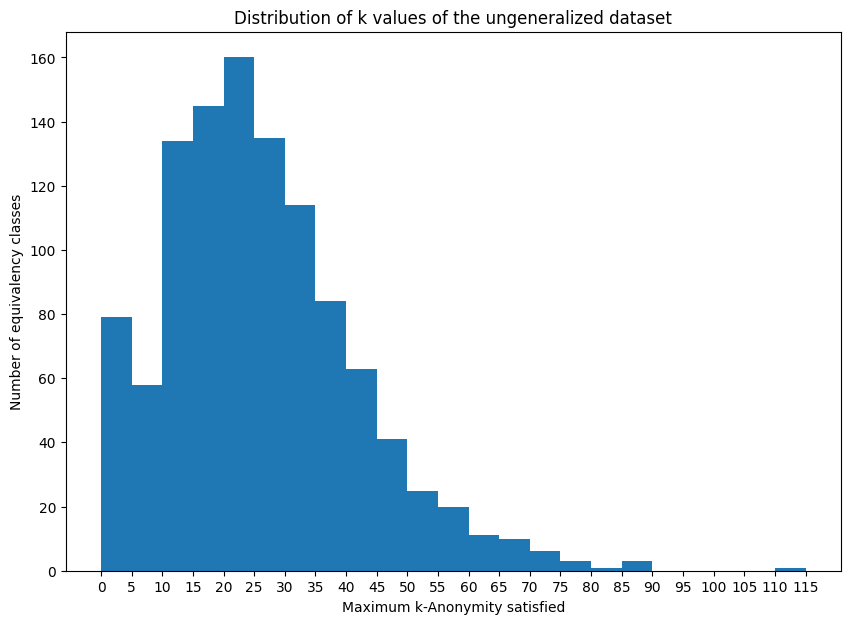

The discernibility cost of the original table is 979251


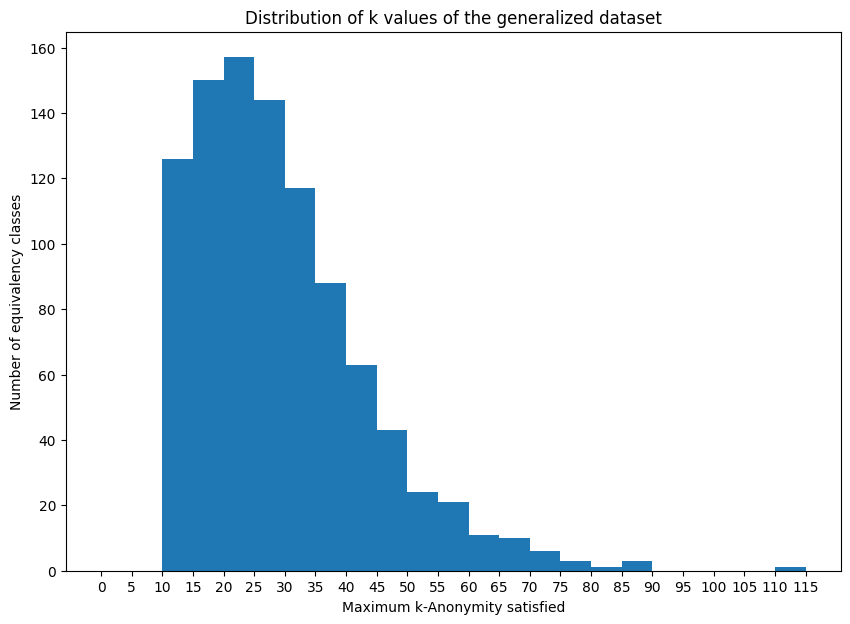

The discernibility cost of the generalized table is 996127, an increase of 1.7233579541915134%


In [42]:
# Comparison between k values before and after suppressing rows
bins = range(0,120, 5)

fig = plt.figure(figsize=(10, 7))
plt.xlabel('Maximum k-Anonymity satisfied')
plt.ylabel('Number of equivalency classes')
plt.title('Distribution of k values of the ungeneralized dataset')
plt.xticks(range(0, 120, 5))

plt.hist(grouped['count'], bins=bins)
plt.show()

cost = discernability_cost(grouped)
print(f'The discernibility cost of the original table is {cost}')

fig = plt.figure(figsize=(10, 7))
plt.xlabel('Maximum k-Anonymity satisfied')
plt.ylabel('Number of equivalency classes')
plt.title('Distribution of k values of the generalized dataset')
plt.xticks(range(0, 120, 5))

plt.hist(generalized_grouped['count'], bins=bins)
plt.show()

generalized_cost = discernability_cost(generalized_grouped)
print(f'The discernibility cost of the generalized table is {generalized_cost}, an increase of {(generalized_cost * 100 / cost) - 100}%')

In [43]:
qID = ['Gender', 'Age', 'City']
desired_ks = range(10, 50, 5)

actual_k_values = []
discernability_costs = []
for k in desired_ks:
  table_out, boundaries = Mondrian(df, qID, k, Mondrian_choose_dim_highest_distinct, Mondrian_choose_cut_first_split)
  actual_k, ec_report = k_anonymity(table_out, qID)

  actual_k_values.append(actual_k)
  discernability_costs.append(discernability_cost(ec_report))

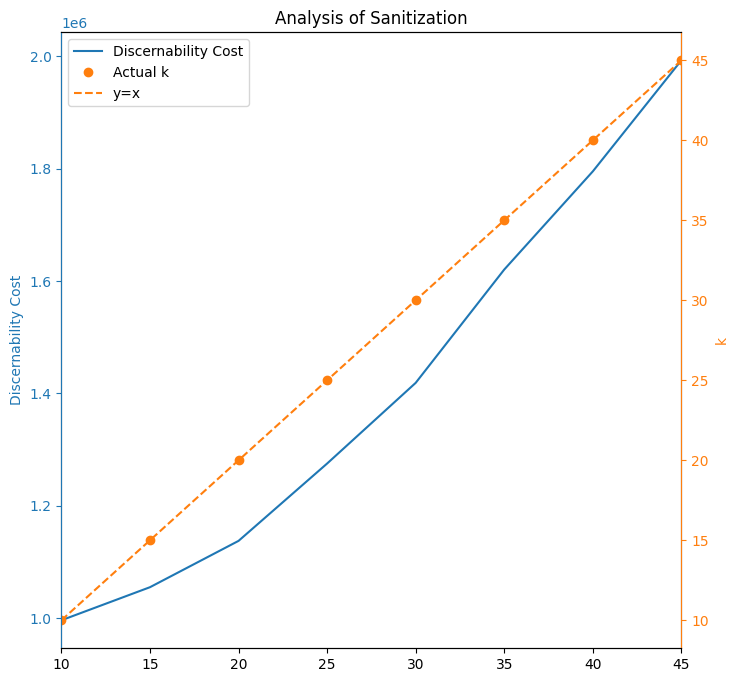

In [44]:
plt.figure(figsize=(8,8))
ax1 = plt.gca()
plt1=plt.plot(desired_ks, discernability_costs, color='C0')
plt.ylabel('Discernability Cost', color='C0')
plt.tick_params(axis='y', color='C0', labelcolor='C0')
ax2 = ax1.twinx()
# plt2=plt.plot(desired_ks, actual_k_values, color='C1')
plt2=plt.plot(desired_ks, actual_k_values, 'o', color='C1')
# For refeerence
plt3=plt.plot(desired_ks, desired_ks, color='C1', linestyle='--')
plt.xlim([min(desired_ks), max(desired_ks)])
plt.ylabel('k', color='C1')
plt.xlabel('desired k')
plt.tick_params(axis='y', color='C1', labelcolor='C1')
ax2.spines['right'].set_color('C1')
ax2.spines['left'].set_color('C0')
plt.title('Analysis of Sanitization')
plt.legend(plt1+plt2+plt3,['Discernability Cost','Actual k','y=x'])
plt.show()

The best rate of discernability cost for privacy improvement is at around 20-25 for this dataset and this range of $k$.

# l-Diversity
Looking at sensitive values

,Gender,Age,City,l (CGPA)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1
635,Male,21.0,Vaanya,1


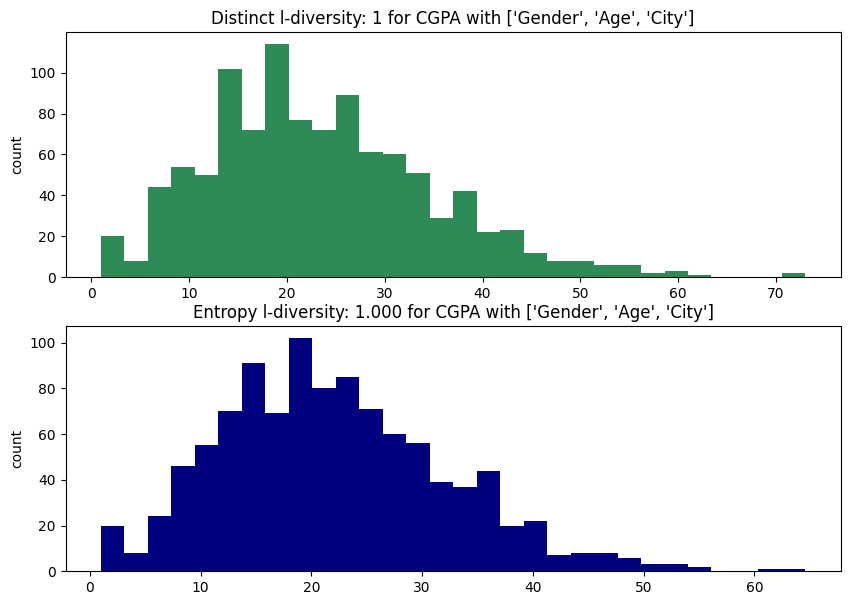

,Gender,Age,City,l (Study Satisfaction)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1
635,Male,21.0,Vaanya,1


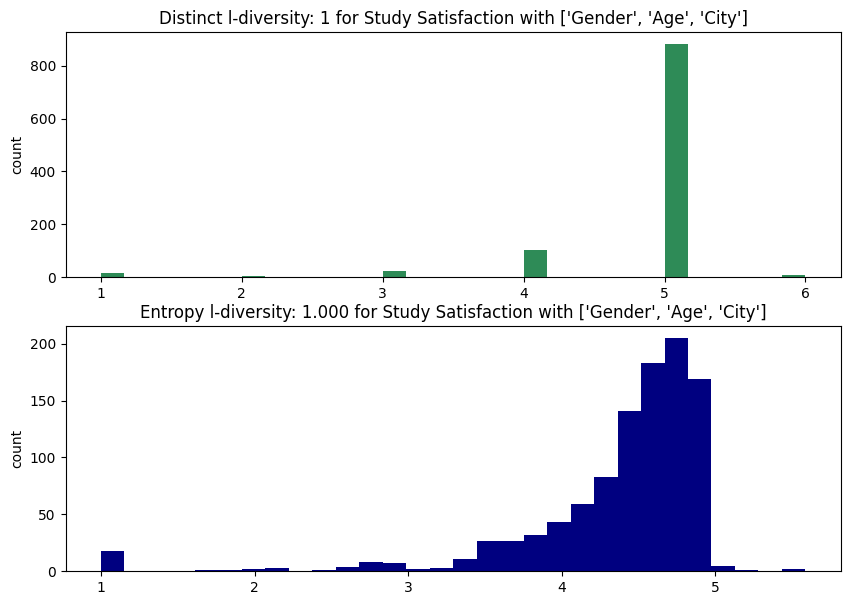

,Gender,Age,City,l (Job Satisfaction)
0,Female,18.0,Agra,1
1,Female,18.0,Ahmedabad,1
2,Female,18.0,Bangalore,1
3,Female,18.0,Bhopal,1
4,Female,18.0,Chennai,1
...,...,...,...,...
1033,Male,34.0,Thane,1
1034,Male,34.0,Vadodara,1
1035,Male,34.0,Varanasi,1
1036,Male,34.0,Vasai-Virar,1


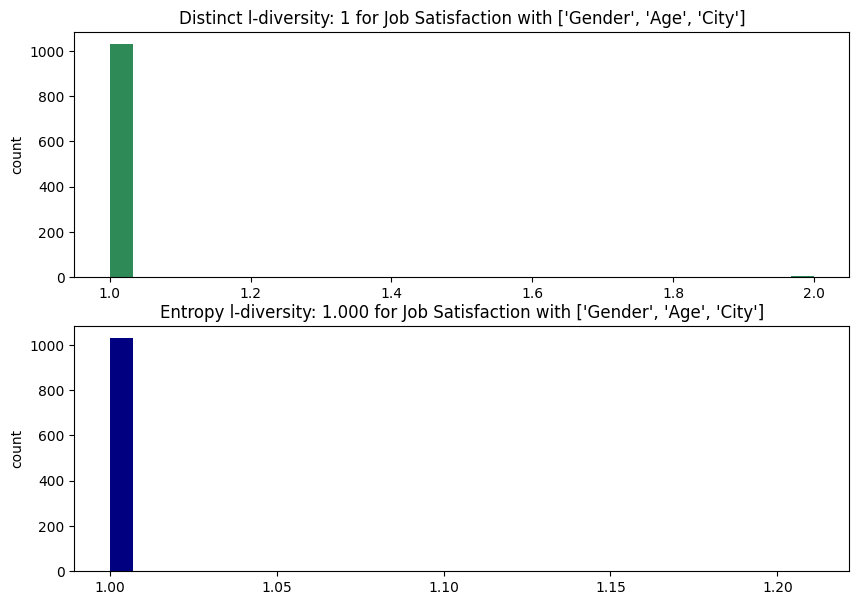

,Gender,Age,City,l (Sleep Duration)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1
635,Male,21.0,Vaanya,1


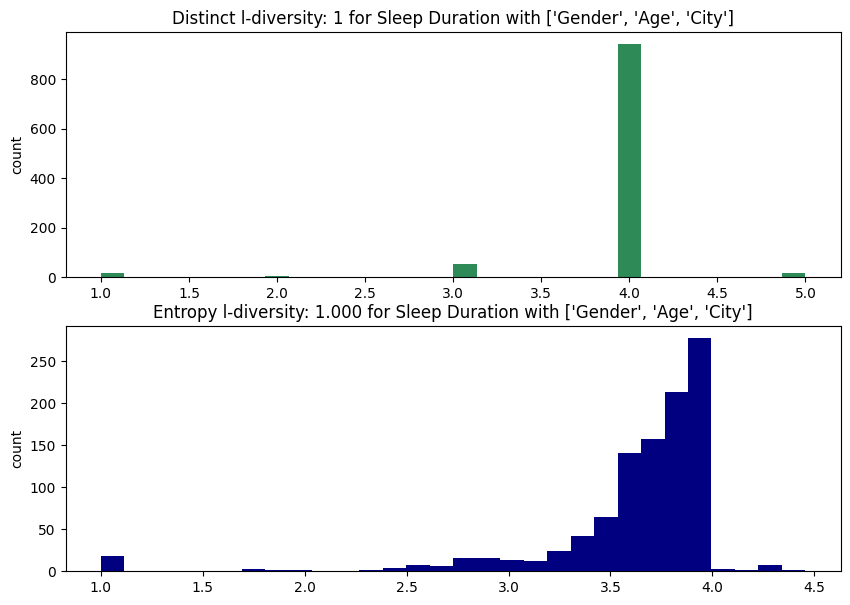

,Gender,Age,City,l (Dietary Habits)
77,Female,20.0,Mira,1
80,Female,20.0,Nashik,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1


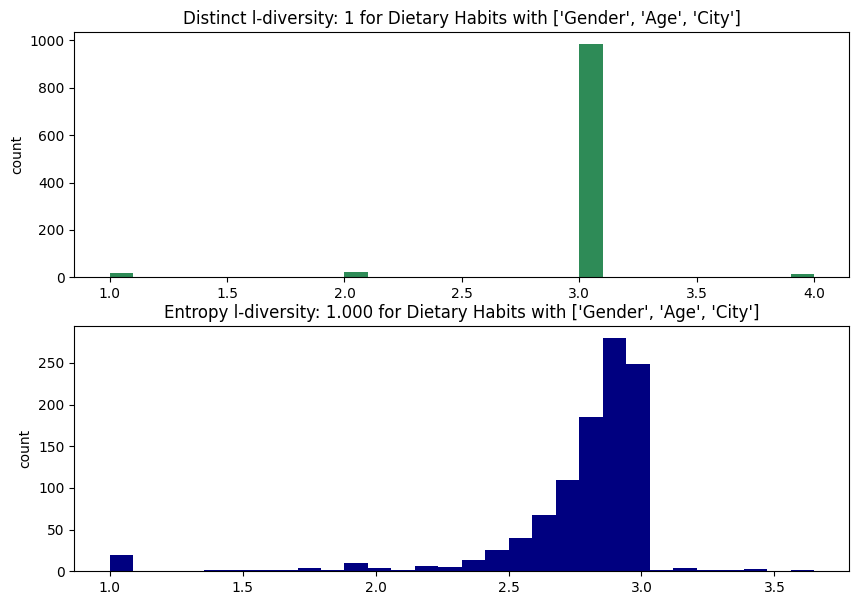

,Gender,Age,City,l (Have you ever had suicidal thoughts ?)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1
635,Male,21.0,Vaanya,1


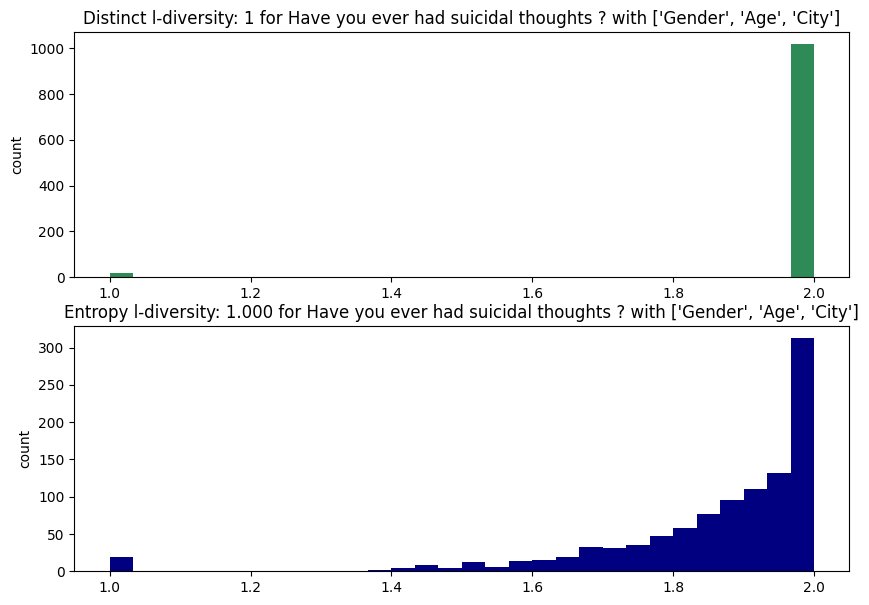

,Gender,Age,City,l (Financial Stress)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1
635,Male,21.0,Vaanya,1


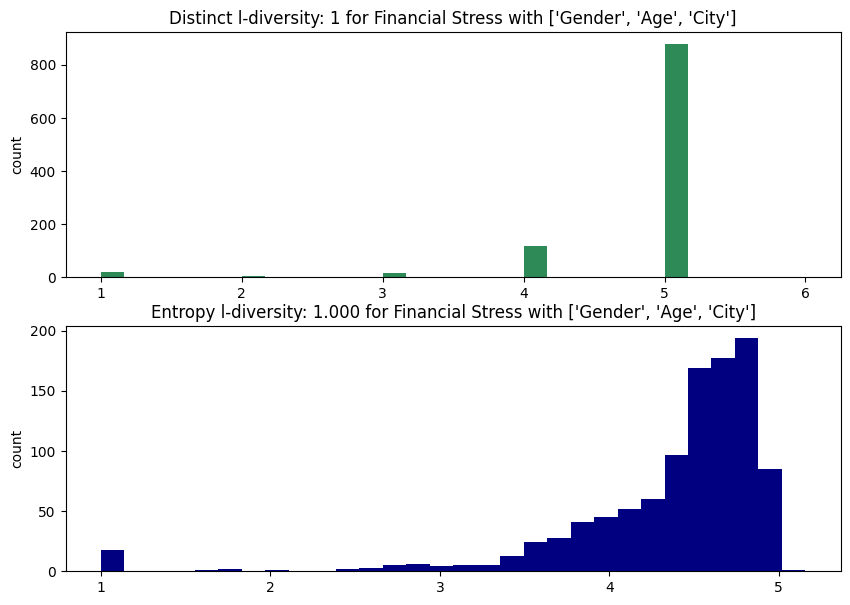

,Gender,Age,City,l (Family History of Mental Illness)
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
262,Female,26.0,Nashik,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1
519,Male,18.0,Bhavna,1
600,Male,20.0,Reyansh,1
621,Male,21.0,Kibara,1


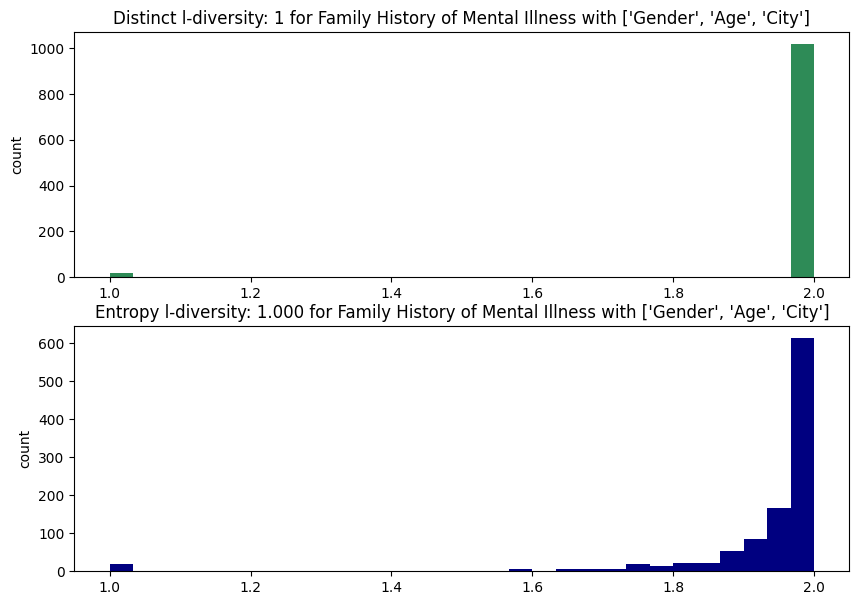

,Gender,Age,City,l (Depression)
5,Female,18.0,Delhi,1
77,Female,20.0,Mira,1
99,Female,21.0,Harsh,1
115,Female,21.0,Rashi,1
120,Female,21.0,Varanasi,1
262,Female,26.0,Nashik,1
270,Female,26.0,Varanasi,1
286,Female,27.0,Khaziabad,1
341,Female,29.0,Gaurav,1
414,Female,31.0,Nalyan,1


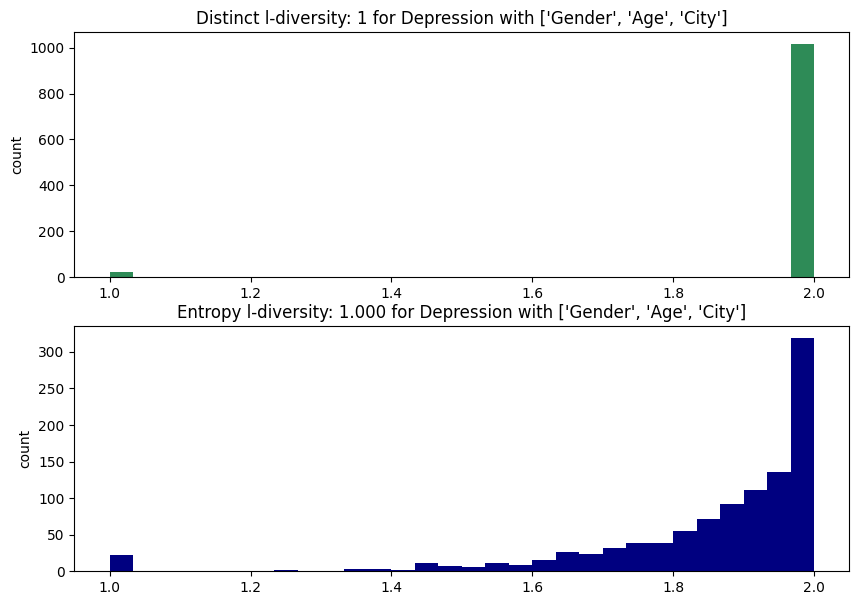

In [45]:
## Qid's 
qID = ['Gender','Age','City']

#qID = ['Age', 'Gender']
#qID = ['City']


## Data wash
## Remove entries with age 35 and over (small number)


df = df[df['Age'] < 35]

## remove "wired" cities
#wired_cities = ['City',"'Less Delhi'","'Less than 5 Kalyan'",'3.0', 'M.Com', 'M.Tech', 'ME','Saanvi', 'Gaurav','Harsh', 'Khaziabad', 'Kibara', 'Mihir', 'Mira', 'Nalini','Nalyan', 'Nandini','Rashi','Reyansh','Vaanya','Harsha','Bhavna'    ]
weird_cities = ['City',"'Less Delhi'","'Less than 5 Kalyan'",'3.0', 'M.Com', 'M.Tech', 'ME']
df = df[~df['City'].isin(weird_cities)]




## Dict of sensitive attributes and its desired l
sensAttrs = {
   'CGPA': 10,
   'Study Satisfaction': 6,
   'Job Satisfaction': 5,
   'Sleep Duration': 5,
   'Dietary Habits': 4,
   'Have you ever had suicidal thoughts ?': 2,
   'Financial Stress': 6,
   'Family History of Mental Illness': 2,
   'Depression': 2,
}


def l_div_report(df, qID, sensAttrs):
  ## Loop over all sensitive attributes
  for sensAttr in sensAttrs.keys():
      
      ## Calculate distinct and entropy min l and l's for all equivalence classes  
      distinct_l,df_distinct_l = distinct_l_diversity(df,qID, sensAttr)
      entropy_l,df_entropy_l = entropy_l_diversity(df,qID, sensAttr)

      ## Dig out the column names with l's for later use
      distinct_column_name=(df_distinct_l.columns[-1])
      entropy_column_name=(df_entropy_l.columns[-1])

      ## Set a number of bins (not overwhelming the calculation)
      bins = 30 #100#len(df_distinct_l)
      
      ## Print out the l scores with lowest l
      display(df_distinct_l[df_distinct_l[distinct_column_name]==distinct_l])
      #diversity_scores = df.groupby(qID)[sensAttr].nunique()     
      #print(diversity_scores[diversity_scores == 1])

      ## Histogram plots
      fig = plt.figure(figsize=(10, 7))
      ax1 = fig.add_subplot(211)
      ax1.hist(df_distinct_l[distinct_column_name], bins=bins, color = 'seagreen')
      ax1.set_title(f"Distinct l-diversity: {distinct_l} for {sensAttr} with {qID}")
      ax1.set_ylabel('count')


      ax2 = fig.add_subplot(212)
      ax2.hist(df_entropy_l[entropy_column_name], bins=bins, color = 'navy')
      ax2.set_title(f"Entropy l-diversity: {entropy_l:.3f} for {sensAttr} with {qID}")
      ax2.set_ylabel('count')
      plt.show()



l_div_report(df, qID, sensAttrs)

## Sensitive values


### l-Diversity Mondrian

In [46]:
# l-Diversity Mondrian
qID = ['Gender', 'Age', 'City']


# generalized_df, boundaries = Mondrian_l_diversity(df, qID, s, desired_l,
#                                                   Mondrian_choose_dim_highest_distinct,
#                                                   Mondrian_choose_cut_first_split_l_diversity)


def Mondrian_l_div_report(df, qID, sensitive_attributes,
                          choose_dim_fn, choose_cut_fn):
  for s in sensitive_attributes.keys():
    try:
      desired_l = sensitive_attributes[s]
      generalized_df, boundaries = Mondrian_l_diversity(df, qID, s, desired_l,
                                                        choose_dim_fn, choose_cut_fn)
      # l_div_report(generalized_df, qID, {s: None})
      generalized_l, generalized_grouped = distinct_l_diversity(generalized_df, qID, s)
      print("--"*30)
      print(f'The table generalized to protect {s} satisfies distinct {generalized_l}-Diversity')
      
      
      grouped = k_anonymity(df, qID)[1]
      k_gen_grouped = k_anonymity(generalized_df, qID)[1]
      d_cost = discernability_cost(grouped)
      d_cost_gen = discernability_cost(k_gen_grouped)
      
      
      print(f'Its discernibility cost is {d_cost_gen}, {(d_cost_gen * 100 / d_cost) - 100 :2.2f}% higher than the ungeneralized table ({d_cost}).')
      display(generalized_grouped.groupby(qID).apply(lambda x: x.index.tolist(), include_groups=False))
      print("--"*30)


    except Exception as exception:
      print(exception)

Mondrian_l_div_report(df, qID, sensAttrs,
                      Mondrian_choose_dim_highest_distinct,
                      Mondrian_choose_cut_first_split_l_diversity)


------------------------------------------------------------
The table generalized to protect CGPA satisfies distinct 10-Diversity
Its discernibility cost is 999192, 2.04% higher than the ungeneralized table (979190).


Gender          Age           City        
(Female,)       (18.0, 18.0)  (Agra,)           [0]
                              (Ahmedabad,)      [1]
                              (Bangalore,)      [2]
                              (Bhopal,)         [3]
                              (Chennai,)        [4]
                                              ...  
(Male, Female)  (32.0, 32.0)  (Mumbai,)       [948]
                              (Nagpur,)       [949]
                              (Rajkot,)       [950]
                              (Surat,)        [951]
                              (Varanasi,)     [952]
Length: 953, dtype: object

------------------------------------------------------------
------------------------------------------------------------
The table generalized to protect Study Satisfaction satisfies distinct 6-Diversity
Its discernibility cost is 161476764, 16390.85% higher than the ungeneralized table (979190).


Gender          Age           City                                                                                                                  
(Male, Female)  (18.0, 18.0)  (Agra, Ahmedabad)                                                                                                         [0]
                              (Visakhapatnam, Surat, Vadodara, Varanasi, Srinagar, Rajkot, Thane, Pune, Vasai-Virar)                                    [1]
                (18.0, 34.0)  (Bangalore, Bhavna, Bhopal)                                                                                               [2]
                              (Faridabad, Delhi, Chennai)                                                                                               [3]
                              (Hyderabad, Jaipur, Kolkata, Lucknow, Ghaziabad, Kibara, Harsha, Kalyan, Khaziabad, Indore, Harsh, Kanpur, Gaurav)        [4]
                              (Meerut, Ludhiana)                       

------------------------------------------------------------
------------------------------------------------------------
The table generalized to protect Job Satisfaction satisfies distinct 5-Diversity
Its discernibility cost is 775288336, 79076.50% higher than the ungeneralized table (979190).


Gender          Age           City                                                                                                                                                                                                                                                                                                                                                                                                  
(Male, Female)  (18.0, 34.0)  (Meerut, Harsha, Kalyan, Patna, Varanasi, Bangalore, Harsh, Rajkot, Mumbai, Gaurav, Visakhapatnam, Jaipur, Ghaziabad, Kibara, Chennai, Mihir, Agra, Reyansh, Srinagar, Indore, Delhi, Nagpur, Saanvi, Hyderabad, Mira, Kolkata, Nashik, Surat, Ludhiana, Faridabad, Thane, Kanpur, Rashi, Bhavna, Vasai-Virar, Lucknow, Nalyan, Khaziabad, Nandini, Vadodara, Bhopal, Ahmedabad, Nalini, Vaanya, Pune)    [0]
dtype: object

------------------------------------------------------------
------------------------------------------------------------
The table generalized to protect Sleep Duration satisfies distinct 5-Diversity
Its discernibility cost is 69929240, 7041.54% higher than the ungeneralized table (979190).


Gender          Age           City                                                                    
(Male, Female)  (18.0, 20.0)  (Visakhapatnam, Surat, Vadodara, Varanasi, Thane, Vasai-Virar)               [0]
                (18.0, 22.0)  (Nashik, Patna, Reyansh, Srinagar, Rajkot, Rashi, Pune)                      [1]
                (18.0, 23.0)  (Nagpur,)                                                                    [2]
                (18.0, 27.0)  (Kibara, Lucknow, Kolkata, Khaziabad, Ludhiana)                              [3]
                (18.0, 30.0)  (Chennai, Bhopal, Bangalore, Delhi, Bhavna)                                  [4]
                (18.0, 34.0)  (Agra,)                                                                      [5]
                              (Ahmedabad,)                                                                 [6]
                              (Faridabad,)                                                                 [7]
         

------------------------------------------------------------
------------------------------------------------------------
The table generalized to protect Dietary Habits satisfies distinct 4-Diversity
Its discernibility cost is 126432516, 12811.95% higher than the ungeneralized table (979190).


Gender          Age           City                                                                                                                                                 
(Male, Female)  (18.0, 32.0)  (Ahmedabad,)                                                                                                                                              [0]
                (18.0, 34.0)  (Agra,)                                                                                                                                                   [1]
                              (Bangalore,)                                                                                                                                              [2]
                              (Ghaziabad, Chennai, Bhopal, Delhi, Faridabad, Bhavna, Gaurav)                                                                                            [3]
                              (Hyderabad, Harsh, Indore, Harsha)    

------------------------------------------------------------
------------------------------------------------------------
The table generalized to protect Have you ever had suicidal thoughts ? satisfies distinct 2-Diversity
Its discernibility cost is 980110, 0.09% higher than the ungeneralized table (979190).


Gender          Age           City            
(Female,)       (18.0, 18.0)  (Agra,)                [0]
                              (Ahmedabad,)           [1]
                              (Bangalore,)           [2]
                              (Bhopal,)              [3]
                              (Chennai,)             [4]
                                                   ...  
(Male,)         (34.0, 34.0)  (Vasai-Virar,)      [1016]
                              (Visakhapatnam,)    [1017]
(Male, Female)  (20.0, 34.0)  (Mihir, Mira)       [1018]
                (21.0, 31.0)  (Harsh, Harsha)     [1019]
                (32.0, 32.0)  (Faridabad,)        [1020]
Length: 1021, dtype: object

------------------------------------------------------------
------------------------------------------------------------
The table generalized to protect Financial Stress satisfies distinct 6-Diversity
Its discernibility cost is 311798440, 31742.49% higher than the ungeneralized table (979190).


Gender          Age           City                                                                                                                                                                                                                  
(Male, Female)  (18.0, 34.0)  (Hyderabad, Ghaziabad, Chennai, Harsha, Agra, Bhopal, Ahmedabad, Bangalore, Harsh, Delhi, Faridabad, Bhavna, Gaurav)                                                                                                      [0]
                              (Jaipur, Kolkata, Kibara, Khaziabad, Kalyan, Indore, Kanpur)                                                                                                                                                              [1]
                              (Meerut, Patna, Varanasi, Rajkot, Mumbai, Visakhapatnam, Mihir, Reyansh, Srinagar, Nagpur, Saanvi, Mira, Nashik, Surat, Ludhiana, Thane, Rashi, Vasai-Virar, Lucknow, Nalyan, Nandini, Vadodara, Nalini, Vaanya, Pune)    [2]

------------------------------------------------------------
------------------------------------------------------------
The table generalized to protect Family History of Mental Illness satisfies distinct 2-Diversity
Its discernibility cost is 979786, 0.06% higher than the ungeneralized table (979190).


Gender          Age           City               
(Female,)       (18.0, 18.0)  (Agra,)                   [0]
                              (Ahmedabad,)              [1]
                              (Bangalore,)              [2]
                              (Bhopal,)                 [3]
                              (Chennai,)                [4]
                                                      ...  
(Male, Female)  (20.0, 34.0)  (Mihir, Mira)          [1019]
                (21.0, 27.0)  (Kibara, Khaziabad)    [1020]
                (21.0, 31.0)  (Harsh, Harsha)        [1021]
                (23.0, 31.0)  (Nalyan, Nalini)       [1022]
                (26.0, 26.0)  (Nashik,)              [1023]
Length: 1024, dtype: object

------------------------------------------------------------
------------------------------------------------------------
The table generalized to protect Depression satisfies distinct 2-Diversity
Its discernibility cost is 981242, 0.21% higher than the ungeneralized table (979190).


Gender          Age           City               
(Female,)       (18.0, 18.0)  (Agra,)                   [0]
                              (Ahmedabad,)              [1]
                              (Bangalore,)              [2]
                              (Bhopal,)                 [3]
                              (Chennai,)                [4]
                                                      ...  
(Male, Female)  (21.0, 27.0)  (Kibara, Khaziabad)    [1014]
                (21.0, 31.0)  (Harsh, Harsha)        [1015]
                (23.0, 31.0)  (Nalyan, Nalini)       [1016]
                (26.0, 26.0)  (Nashik,)              [1017]
                              (Varanasi,)            [1018]
Length: 1019, dtype: object

------------------------------------------------------------


Many of these costs are quite a bit higher after generalizing -- they are the non-binary attributes (eg Dietary Habits, Financial Stress) because for our examples here we're asking for a much higher $l$.

### Sanitization Report

In [47]:
qID = ['Gender', 'Age', 'City']

s = 'CGPA'
desired_ls = range(2, sensAttrs[s] + 1)
print("Desired l s", desired_ls)
actual_l_values = []
discernability_costs = []
for l in desired_ls:
  table_out, boundaries = Mondrian_l_diversity(df, qID, s, l,
                                               Mondrian_choose_dim_highest_distinct,
                                               Mondrian_choose_cut_first_split_l_diversity)
  ec_report = k_anonymity(table_out, qID)[1]
  actual_l = distinct_l_diversity(table_out, qID, s)[0]

  actual_l_values.append(actual_l)
  discernability_costs.append(discernability_cost(ec_report))

Desired l s range(2, 11)


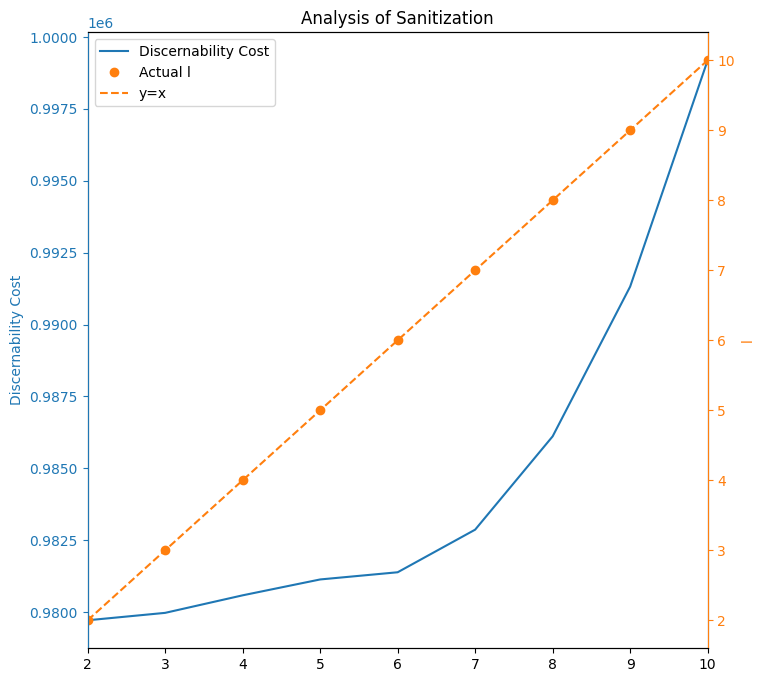

In [48]:
plt.figure(figsize=(8,8))
ax1 = plt.gca()
plt1=plt.plot(desired_ls, discernability_costs, color='C0')
plt.ylabel('Discernability Cost', color='C0')
plt.tick_params(axis='y', color='C0', labelcolor='C0')
ax2 = ax1.twinx()
# plt2=plt.plot(desired_ks, actual_k_values, color='C1')
plt2=plt.plot(desired_ls, actual_l_values, 'o', color='C1')
# For refeerence
plt3=plt.plot(desired_ls, desired_ls, color='C1', linestyle='--')
plt.xlim([min(desired_ls), max(desired_ls)])
plt.ylabel('l', color='C1')
plt.xlabel('desired l')
plt.tick_params(axis='y', color='C1', labelcolor='C1')
ax2.spines['right'].set_color('C1')
ax2.spines['left'].set_color('C0')
plt.title('Analysis of Sanitization')
plt.legend(plt1+plt2+plt3,['Discernability Cost','Actual l','y=x'])
plt.show()

The best rate of discernability cost for privacy is provided at around 6 to 7 for this dataset and sensitive attribute CGPA.

# t-closeness

t is: 0.576


,Gender,Age,City,EMD,count
0,Female,18.0,Agra,0.277409,17
1,Female,18.0,Ahmedabad,0.114945,21
2,Female,18.0,Bangalore,0.043555,22
3,Female,18.0,Bhopal,0.075374,20
4,Female,18.0,Chennai,0.092040,30
...,...,...,...,...,...
1033,Male,34.0,Thane,0.028635,24
1034,Male,34.0,Vadodara,0.117198,12
1035,Male,34.0,Varanasi,0.107960,18
1036,Male,34.0,Vasai-Virar,0.054098,54


,Gender,Age,City,EMD,count
99,Female,21.0,Harsh,0.575532,1
115,Female,21.0,Rashi,0.424468,1
519,Male,18.0,Bhavna,0.424468,1
600,Male,20.0,Reyansh,0.424468,1
621,Male,21.0,Kibara,0.424468,1
872,Male,29.0,Nandini,0.424468,1
877,Male,29.0,Saanvi,0.424468,1
924,Male,31.0,Harsha,0.424468,1


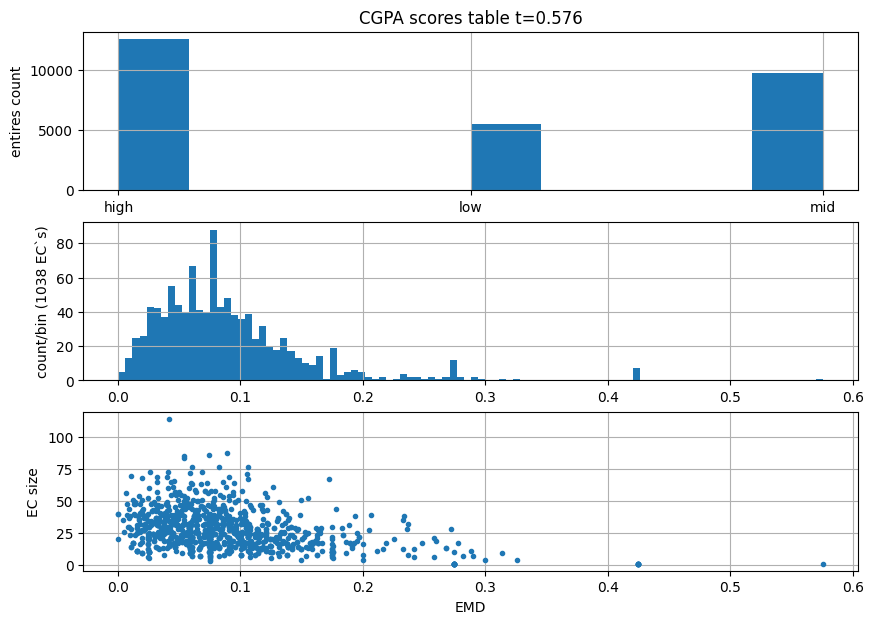

In [49]:
from finalPrivacyFuncs import EMD_ordered_distance

## Turn the CGPA scores into bins:
CGPA_bins = [4,6,8,10]
CGPA_labels = ['low','mid','high']
df['CGPA_binned'] = pd.cut(df['CGPA'], bins= CGPA_bins, labels = CGPA_labels, include_lowest=True)

## The sensitivity order most sensitive to least sensitive
CGPA_order  = ['low','high','mid']

## calculate t for the table and EMD for each EC
tt,EC_EMD = EMD_ordered_distance(df,qID,'CGPA_binned',CGPA_order)



## calculate the size of each EQ (using k-anon)
k, EC_sizes = k_anonymity(df, qID)

## Do a left join to put the EQ sizes into the t/EMD results
EC_EMD_reset = EC_EMD.reset_index()

t_equivalence_classes = EC_EMD_reset.merge(EC_sizes[['Gender', 'Age', 'City', 'count']], on=['Gender', 'Age', 'City'],how='left')

print(f"t is: {tt:.3f}")
display(t_equivalence_classes)




## Plots

## Plot the data grade distribution
# Reindex according to desired order
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(311)
ax1.set_title(f"CGPA scores table t={tt:.3f}")
ax1.set_ylabel('entires count')
df['CGPA_binned'].hist(ax=ax1)

ax2 = fig.add_subplot(312)
t_equivalence_classes['EMD'].hist(bins = 100, ax=ax2)
ax2.set_ylabel(f'count/bin ({len(t_equivalence_classes)} EC`s)')
#ax2.set_xlabel('EMD')


ax3 = fig.add_subplot(313)
ax3.plot(t_equivalence_classes['EMD'],t_equivalence_classes['count'], '.')
ax3.set_ylabel(f'EC size')
ax3.grid('on')
ax3.set_xlabel('EMD')

display(t_equivalence_classes[t_equivalence_classes['EMD']>0.35])



,Gender,Age,City,l (CGPA)
15,"(Female,)","(18.0, 18.0)","(Nagpur,)",11
85,"(Female,)","(21.0, 21.0)","(Delhi,)",11
112,"(Female,)","(22.0, 22.0)","(Kolkata,)",11
122,"(Female,)","(22.0, 22.0)","(Vadodara,)",11
139,"(Female,)","(23.0, 23.0)","(Nagpur,)",11
140,"(Female,)","(23.0, 23.0)","(Nashik,)",11
215,"(Female,)","(26.0, 26.0)","(Vadodara,)",11
253,"(Female,)","(28.0, 28.0)","(Indore,)",11
280,"(Female,)","(29.0, 29.0)","(Faridabad,)",11
290,"(Female,)","(29.0, 29.0)","(Meerut,)",11


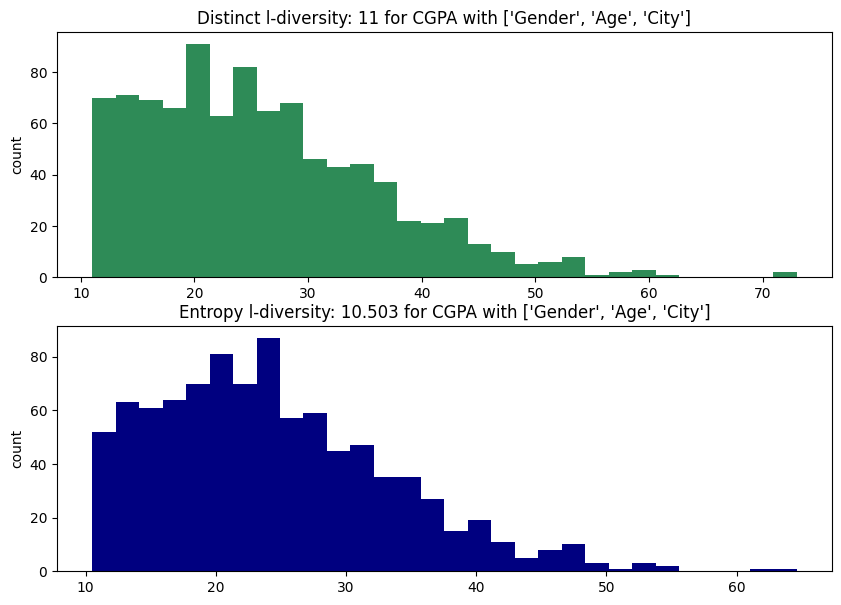

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA_binned
0,19051,"(Female,)","(18.0, 18.0)","(Agra,)",Student,3.0,0.0,6.03,4.0,0.0,Others,Unhealthy,BA,Yes,12.0,5.0,No,1,mid
1,23427,"(Female,)","(18.0, 18.0)","(Agra,)",Student,4.0,0.0,7.53,3.0,0.0,'More than 8 hours',Healthy,'Class 12',Yes,0.0,5.0,Yes,1,mid
2,29406,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,5.6,1.0,0.0,'5-6 hours',Moderate,'Class 12',No,9.0,1.0,No,0,low
3,33909,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,7.92,2.0,0.0,'Less than 5 hours',Moderate,'Class 12',No,5.0,4.0,Yes,1,mid
4,34281,"(Female,)","(18.0, 18.0)","(Agra,)",Student,2.0,0.0,7.8,3.0,0.0,'7-8 hours',Healthy,'Class 12',Yes,8.0,1.0,Yes,1,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,126102,"(Male, Female)","(32.0, 32.0)","(Varanasi,)",Student,3.0,0.0,8.17,3.0,0.0,'7-8 hours',Moderate,B.Tech,Yes,1.0,4.0,Yes,1,high
27840,131252,"(Male, Female)","(32.0, 32.0)","(Varanasi,)",Student,1.0,0.0,5.85,2.0,0.0,'More than 8 hours',Healthy,MSc,Yes,6.0,5.0,Yes,0,low
27841,132967,"(Male, Female)","(32.0, 32.0)","(Varanasi,)",Student,3.0,0.0,7.22,1.0,0.0,'Less than 5 hours',Moderate,B.Com,Yes,3.0,3.0,Yes,0,mid
27842,133141,"(Male, Female)","(32.0, 32.0)","(Varanasi,)",Student,4.0,0.0,5.32,4.0,0.0,'7-8 hours',Unhealthy,M.Tech,Yes,10.0,4.0,Yes,1,low


t is: 0.277


,Gender,Age,City,EMD,count
0,"(Female,)","(18.0, 18.0)","(Agra,)",0.277409,17
1,"(Female,)","(18.0, 18.0)","(Ahmedabad,)",0.114945,21
2,"(Female,)","(18.0, 18.0)","(Bangalore,)",0.043555,22
3,"(Female,)","(18.0, 18.0)","(Bhopal,)",0.075374,20
4,"(Female,)","(18.0, 18.0)","(Chennai,)",0.092040,30
...,...,...,...,...,...
927,"(Male, Female)","(32.0, 32.0)","(Mumbai,)",0.091135,21
928,"(Male, Female)","(32.0, 32.0)","(Nagpur,)",0.043857,26
929,"(Male, Female)","(32.0, 32.0)","(Rajkot,)",0.058707,27
930,"(Male, Female)","(32.0, 32.0)","(Surat,)",0.045374,25


Text(0.5, 0, 'EMD')

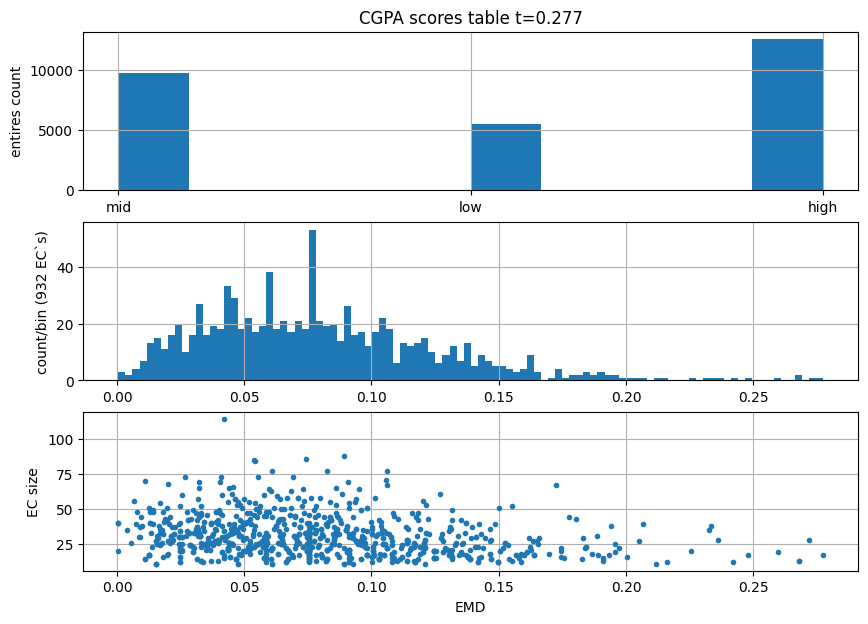

In [50]:

s = 'CGPA'
desired_l = 11
sensAttrs = {'CGPA':10}

generalized_df, boundaries = Mondrian_l_diversity(df, qID, s, desired_l, Mondrian_choose_dim_highest_distinct, Mondrian_choose_cut_first_split_l_diversity)

l_div_report(generalized_df, qID, sensAttrs)



display(generalized_df)
## Turn the CGPA scores into bins:
CGPA_bins = [4,6,8,10]
CGPA_labels = ['low','mid','high']
generalized_df['CGPA_binned'] = pd.cut(generalized_df['CGPA'], bins= CGPA_bins, labels = CGPA_labels, include_lowest=True)

## The sensitivity order most sensitive to least sensitive
CGPA_order  = ['low','high','mid']

## calculate t for the table and EMD for each EC
tt,EC_EMD = EMD_ordered_distance(generalized_df,qID,'CGPA_binned',CGPA_order)



## calculate the size of each EQ (using k-anon)
k, EC_sizes = k_anonymity(generalized_df, qID)

## Do a left join to put the EQ sizes into the t/EMD results
EC_EMD_reset = EC_EMD.reset_index()

t_equivalence_classes = EC_EMD_reset.merge(EC_sizes[['Gender', 'Age', 'City', 'count']], on=['Gender', 'Age', 'City'],how='left')

print(f"t is: {tt:.3f}")
display(t_equivalence_classes)




## Plots

## Plot the data grade distribution
# Reindex according to desired order
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(311)
ax1.set_title(f"CGPA scores table t={tt:.3f}")
ax1.set_ylabel('entires count')
generalized_df['CGPA_binned'].hist(ax=ax1)

ax2 = fig.add_subplot(312)
t_equivalence_classes['EMD'].hist(bins = 100, ax=ax2)
ax2.set_ylabel(f'count/bin ({len(t_equivalence_classes)} EC`s)')
#ax2.set_xlabel('EMD')


ax3 = fig.add_subplot(313)
ax3.plot(t_equivalence_classes['EMD'],t_equivalence_classes['count'], '.')
ax3.set_ylabel(f'EC size')
ax3.grid('on')
ax3.set_xlabel('EMD')

,Gender,Age,City,l (Study Satisfaction)
0,"(Male, Female)","(18.0, 18.0)","(Agra, Ahmedabad)",6
1,"(Male, Female)","(18.0, 18.0)","(Visakhapatnam, Surat, Vadodara, Varanasi, Sri...",6
2,"(Male, Female)","(18.0, 34.0)","(Bangalore, Bhavna, Bhopal)",6
3,"(Male, Female)","(18.0, 34.0)","(Faridabad, Delhi, Chennai)",6
4,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Jaipur, Kolkata, Lucknow, Ghaziaba...",6
5,"(Male, Female)","(18.0, 34.0)","(Meerut, Ludhiana)",6
6,"(Male, Female)","(18.0, 34.0)","(Nalyan, Nashik, Mihir, Patna, Nandini, Nalini...",6
7,"(Male, Female)","(19.0, 34.0)","(Agra, Ahmedabad)",6
8,"(Male, Female)","(19.0, 34.0)","(Visakhapatnam, Saanvi, Surat, Reyansh, Vadoda...",6


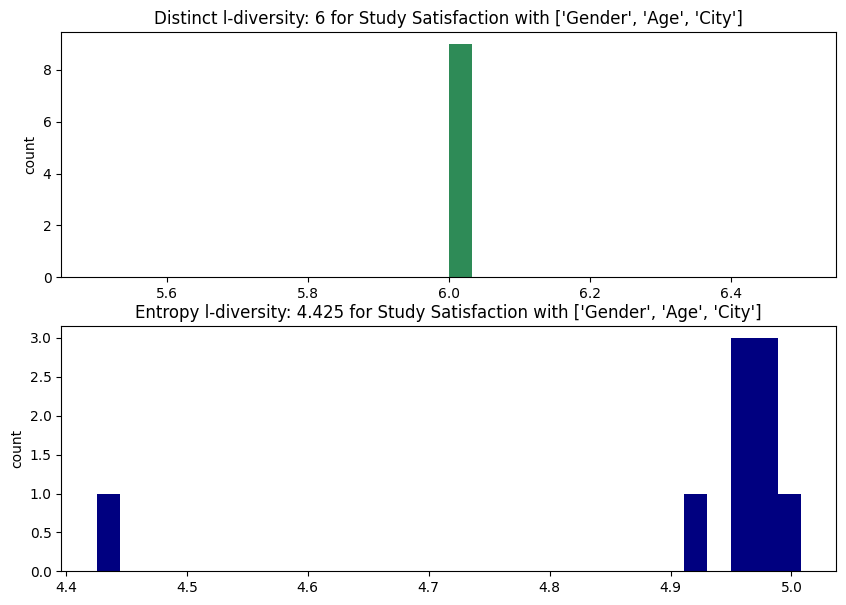

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA_binned
0,785,"(Male, Female)","(18.0, 18.0)","(Agra, Ahmedabad)",Student,5.0,0.0,5.37,4.0,0.0,'More than 8 hours',Healthy,'Class 12',Yes,9.0,2.0,Yes,1,low
1,1022,"(Male, Female)","(18.0, 18.0)","(Agra, Ahmedabad)",Student,3.0,0.0,6.16,5.0,0.0,'7-8 hours',Moderate,'Class 12',Yes,5.0,4.0,Yes,0,mid
2,1319,"(Male, Female)","(18.0, 18.0)","(Agra, Ahmedabad)",Student,5.0,0.0,8.35,1.0,0.0,'More than 8 hours',Unhealthy,'Class 12',Yes,12.0,5.0,No,1,high
3,3515,"(Male, Female)","(18.0, 18.0)","(Agra, Ahmedabad)",Student,1.0,0.0,6.75,2.0,0.0,'Less than 5 hours',Moderate,'Class 12',Yes,12.0,3.0,No,0,mid
4,3987,"(Male, Female)","(18.0, 18.0)","(Agra, Ahmedabad)",Student,2.0,0.0,8.24,5.0,0.0,'More than 8 hours',Moderate,'Class 12',Yes,3.0,3.0,Yes,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,140568,"(Male, Female)","(19.0, 34.0)","(Visakhapatnam, Saanvi, Surat, Reyansh, Vadoda...",Student,2.0,0.0,5.86,3.0,0.0,'Less than 5 hours',Unhealthy,M.Ed,No,1.0,2.0,No,0,low
27840,140624,"(Male, Female)","(19.0, 34.0)","(Visakhapatnam, Saanvi, Surat, Reyansh, Vadoda...",Student,4.0,0.0,9.19,1.0,0.0,'5-6 hours',Healthy,MSc,No,7.0,4.0,Yes,1,high
27841,140645,"(Male, Female)","(19.0, 34.0)","(Visakhapatnam, Saanvi, Surat, Reyansh, Vadoda...",Student,4.0,0.0,7.77,3.0,0.0,'Less than 5 hours',Unhealthy,MSc,No,2.0,5.0,No,1,mid
27842,140681,"(Male, Female)","(19.0, 34.0)","(Visakhapatnam, Saanvi, Surat, Reyansh, Vadoda...",Student,3.0,0.0,6.0,2.0,0.0,'More than 8 hours',Healthy,MBBS,Yes,12.0,4.0,No,0,low


t is: 0.210


,Gender,Age,City,EMD,count
0,"(Male, Female)","(18.0, 18.0)","(Agra, Ahmedabad)",0.209977,146
1,"(Male, Female)","(18.0, 18.0)","(Visakhapatnam, Surat, Vadodara, Varanasi, Sri...",0.100334,544
2,"(Male, Female)","(18.0, 34.0)","(Bangalore, Bhavna, Bhopal)",0.039521,1700
3,"(Male, Female)","(18.0, 34.0)","(Faridabad, Delhi, Chennai)",0.024070,2111
4,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Jaipur, Kolkata, Lucknow, Ghaziaba...",0.018950,8158
5,"(Male, Female)","(18.0, 34.0)","(Meerut, Ludhiana)",0.012336,1931
6,"(Male, Female)","(18.0, 34.0)","(Nalyan, Nashik, Mihir, Patna, Nandini, Nalini...",0.029190,2901
7,"(Male, Female)","(19.0, 34.0)","(Agra, Ahmedabad)",0.016340,1896
8,"(Male, Female)","(19.0, 34.0)","(Visakhapatnam, Saanvi, Surat, Reyansh, Vadoda...",0.012432,8457


,Gender,Age,City,l (Job Satisfaction)
0,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",5


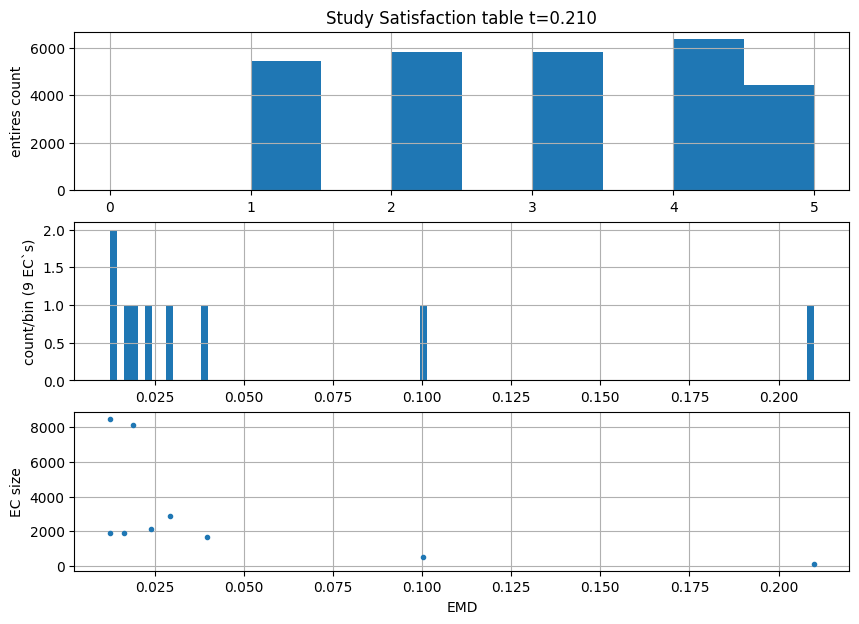

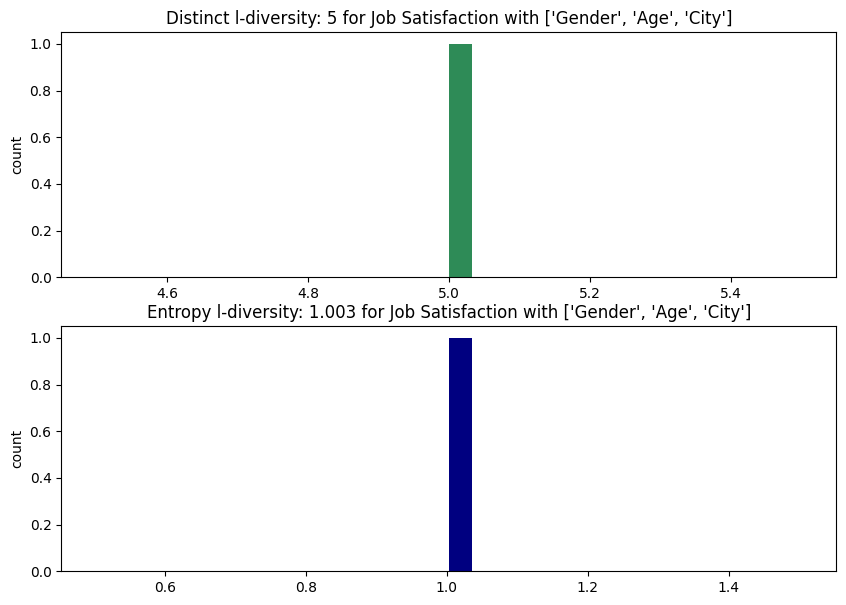

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA_binned
0,2,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1,high
1,8,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",Student,2.0,0.0,5.9,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0,low
2,26,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0,mid
3,30,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1,low
4,32,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,140685,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0,low
27840,140686,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",Student,2.0,0.0,9.4,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0,high
27841,140689,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0,mid
27842,140690,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1,mid


t is: 0.000


,Gender,Age,City,EMD,count
0,"(Male, Female)","(18.0, 34.0)","(Meerut, Harsha, Kalyan, Patna, Varanasi, Bang...",0.0,27844


,Gender,Age,City,l (Sleep Duration)
0,"(Male, Female)","(18.0, 20.0)","(Visakhapatnam, Surat, Vadodara, Varanasi, Tha...",5
1,"(Male, Female)","(18.0, 22.0)","(Nashik, Patna, Reyansh, Srinagar, Rajkot, Ras...",5
2,"(Male, Female)","(18.0, 23.0)","(Nagpur,)",5
3,"(Male, Female)","(18.0, 27.0)","(Kibara, Lucknow, Kolkata, Khaziabad, Ludhiana)",5
4,"(Male, Female)","(18.0, 30.0)","(Chennai, Bhopal, Bangalore, Delhi, Bhavna)",5
5,"(Male, Female)","(18.0, 34.0)","(Agra,)",5
6,"(Male, Female)","(18.0, 34.0)","(Ahmedabad,)",5
7,"(Male, Female)","(18.0, 34.0)","(Faridabad,)",5
8,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Ghaziabad, Harsha, Harsh, Gaurav)",5
9,"(Male, Female)","(18.0, 34.0)","(Kalyan, Jaipur, Indore)",5


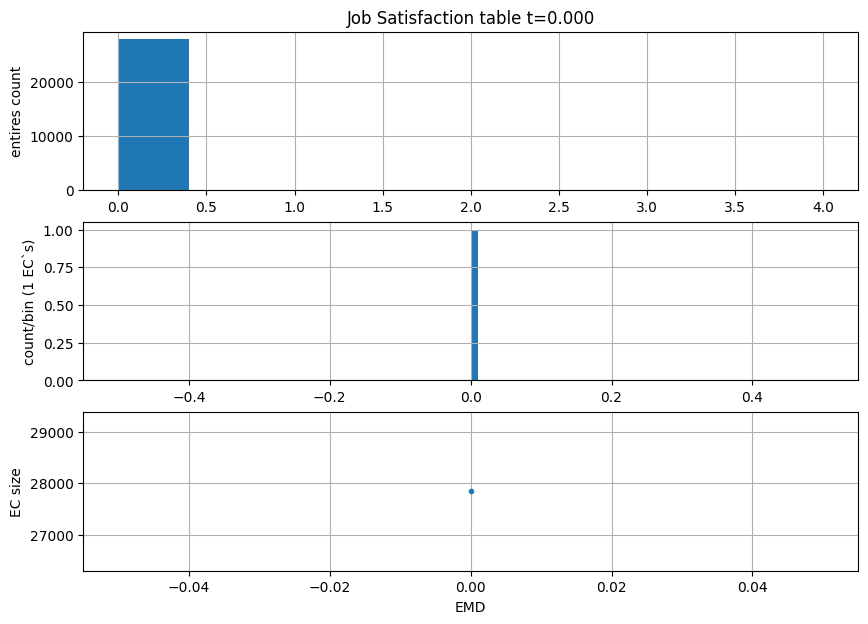

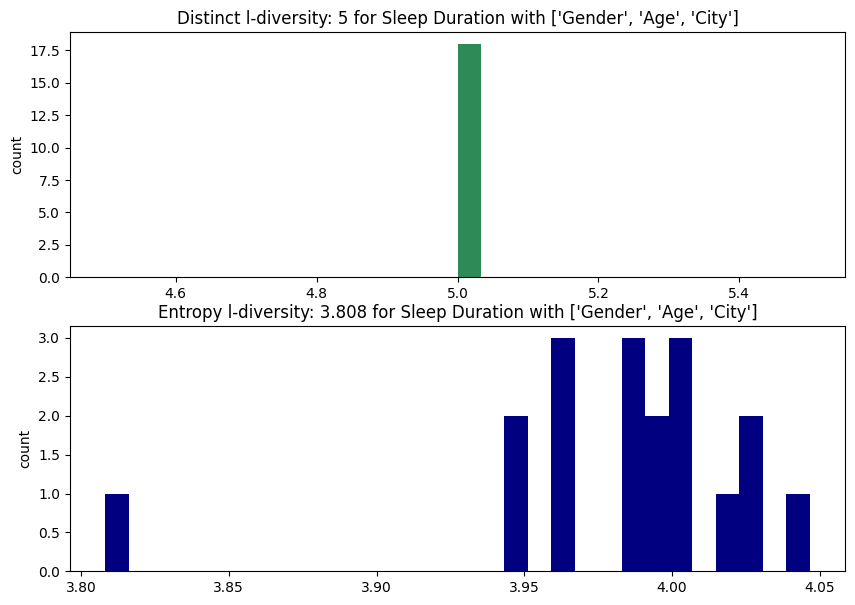

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA_binned
0,222,"(Male, Female)","(18.0, 20.0)","(Visakhapatnam, Surat, Vadodara, Varanasi, Tha...",Student,4.0,0.0,6.7,5.0,0.0,'Less than 5 hours',Moderate,'Class 12',Yes,5.0,4.0,Yes,1,mid
1,232,"(Male, Female)","(18.0, 20.0)","(Visakhapatnam, Surat, Vadodara, Varanasi, Tha...",Student,2.0,0.0,6.21,3.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,4.0,2.0,No,1,mid
2,274,"(Male, Female)","(18.0, 20.0)","(Visakhapatnam, Surat, Vadodara, Varanasi, Tha...",Student,3.0,0.0,6.99,2.0,0.0,'7-8 hours',Moderate,'Class 12',Yes,11.0,5.0,Yes,1,mid
3,324,"(Male, Female)","(18.0, 20.0)","(Visakhapatnam, Surat, Vadodara, Varanasi, Tha...",Student,3.0,0.0,5.7,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,11.0,4.0,No,1,low
4,381,"(Male, Female)","(18.0, 20.0)","(Visakhapatnam, Surat, Vadodara, Varanasi, Tha...",Student,5.0,0.0,8.7,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',Yes,4.0,5.0,Yes,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,139662,"(Male, Female)","(31.0, 34.0)","(Bangalore, Bhopal, Delhi, Chennai)",Student,5.0,0.0,8.37,5.0,0.0,'Less than 5 hours',Healthy,BBA,No,10.0,1.0,No,0,high
27840,139758,"(Male, Female)","(31.0, 34.0)","(Bangalore, Bhopal, Delhi, Chennai)",Student,1.0,0.0,8.74,3.0,0.0,'7-8 hours',Healthy,LLM,No,12.0,3.0,Yes,0,high
27841,139838,"(Male, Female)","(31.0, 34.0)","(Bangalore, Bhopal, Delhi, Chennai)",Student,1.0,0.0,9.71,1.0,0.0,'Less than 5 hours',Unhealthy,B.Tech,No,3.0,1.0,No,0,high
27842,140444,"(Male, Female)","(31.0, 34.0)","(Bangalore, Bhopal, Delhi, Chennai)",Student,4.0,0.0,8.55,3.0,0.0,'5-6 hours',Unhealthy,PhD,Yes,1.0,1.0,No,1,high


t is: 0.102


,Gender,Age,City,EMD,count
0,"(Male, Female)","(18.0, 20.0)","(Visakhapatnam, Surat, Vadodara, Varanasi, Tha...",0.029979,1031
1,"(Male, Female)","(18.0, 22.0)","(Nashik, Patna, Reyansh, Srinagar, Rajkot, Ras...",0.034772,1271
2,"(Male, Female)","(18.0, 23.0)","(Nagpur,)",0.036409,239
3,"(Male, Female)","(18.0, 27.0)","(Kibara, Lucknow, Kolkata, Khaziabad, Ludhiana)",0.009215,1952
4,"(Male, Female)","(18.0, 30.0)","(Chennai, Bhopal, Bangalore, Delhi, Bhavna)",0.022851,2675
5,"(Male, Female)","(18.0, 34.0)","(Agra,)",0.018971,1091
6,"(Male, Female)","(18.0, 34.0)","(Ahmedabad,)",0.039934,951
7,"(Male, Female)","(18.0, 34.0)","(Faridabad,)",0.058016,461
8,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Ghaziabad, Harsha, Harsh, Gaurav)",0.021482,2085
9,"(Male, Female)","(18.0, 34.0)","(Kalyan, Jaipur, Indore)",0.023700,3246


,Gender,Age,City,l (Dietary Habits)
0,"(Male, Female)","(18.0, 32.0)","(Ahmedabad,)",4
1,"(Male, Female)","(18.0, 34.0)","(Agra,)",4
2,"(Male, Female)","(18.0, 34.0)","(Bangalore,)",4
3,"(Male, Female)","(18.0, 34.0)","(Ghaziabad, Chennai, Bhopal, Delhi, Faridabad,...",4
4,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Harsh, Indore, Harsha)",4
5,"(Male, Female)","(18.0, 34.0)","(Jaipur,)",4
6,"(Male, Female)","(18.0, 34.0)","(Kolkata, Kibara, Khaziabad, Kalyan, Kanpur)",4
7,"(Male, Female)","(18.0, 34.0)","(Lucknow,)",4
8,"(Male, Female)","(18.0, 34.0)","(Meerut, Ludhiana)",4
9,"(Male, Female)","(18.0, 34.0)","(Patna, Rajkot, Mumbai, Mihir, Reyansh, Srinag...",4


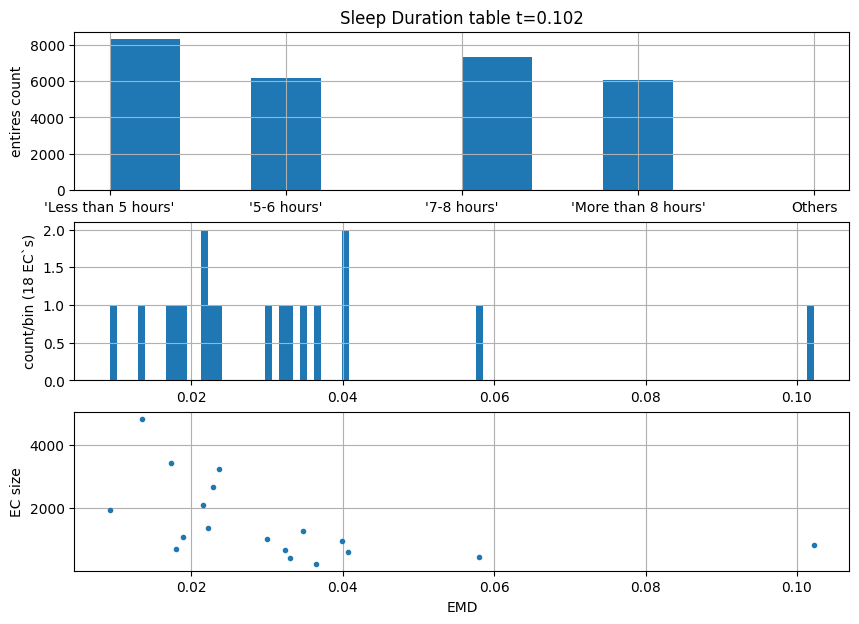

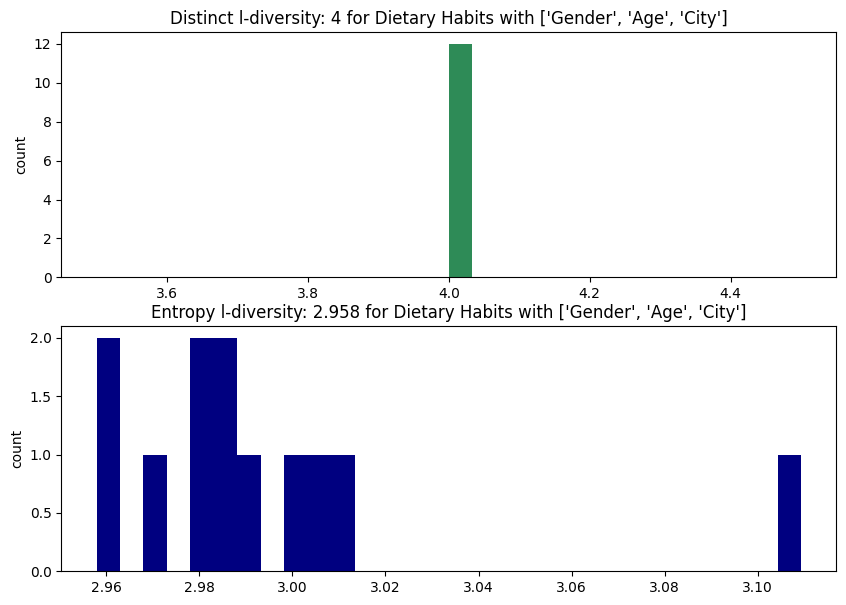

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA_binned
0,132,"(Male, Female)","(18.0, 32.0)","(Ahmedabad,)",Student,5.0,0.0,7.25,3.0,0.0,'5-6 hours',Healthy,'Class 12',Yes,10.0,3.0,No,1,mid
1,166,"(Male, Female)","(18.0, 32.0)","(Ahmedabad,)",Student,3.0,0.0,5.57,3.0,0.0,'More than 8 hours',Unhealthy,MSc,Yes,10.0,5.0,No,1,low
2,186,"(Male, Female)","(18.0, 32.0)","(Ahmedabad,)",Student,2.0,0.0,6.08,5.0,0.0,'7-8 hours',Moderate,LLB,Yes,3.0,3.0,Yes,1,mid
3,477,"(Male, Female)","(18.0, 32.0)","(Ahmedabad,)",Student,4.0,0.0,6.95,4.0,0.0,'More than 8 hours',Unhealthy,'Class 12',Yes,12.0,5.0,No,1,mid
4,609,"(Male, Female)","(18.0, 32.0)","(Ahmedabad,)",'Civil Engineer',5.0,0.0,7.83,1.0,0.0,'5-6 hours',Healthy,MSc,Yes,11.0,3.0,Yes,1,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,132104,"(Male, Female)","(33.0, 34.0)","(Ahmedabad,)",Student,4.0,0.0,9.42,2.0,0.0,'Less than 5 hours',Healthy,B.Tech,No,12.0,4.0,Yes,0,high
27840,132376,"(Male, Female)","(33.0, 34.0)","(Ahmedabad,)",Student,1.0,0.0,8.08,1.0,0.0,'7-8 hours',Moderate,BHM,Yes,12.0,3.0,Yes,1,high
27841,137483,"(Male, Female)","(33.0, 34.0)","(Ahmedabad,)",Student,3.0,0.0,7.53,3.0,0.0,'7-8 hours',Unhealthy,'Class 12',Yes,2.0,4.0,Yes,0,mid
27842,139660,"(Male, Female)","(33.0, 34.0)","(Ahmedabad,)",Student,3.0,0.0,6.36,3.0,0.0,'Less than 5 hours',Moderate,MSc,Yes,6.0,5.0,Yes,1,mid


t is: 0.053


,Gender,Age,City,EMD,count
0,"(Male, Female)","(18.0, 32.0)","(Ahmedabad,)",0.046246,864
1,"(Male, Female)","(18.0, 34.0)","(Agra,)",0.017827,1091
2,"(Male, Female)","(18.0, 34.0)","(Bangalore,)",0.017493,766
3,"(Male, Female)","(18.0, 34.0)","(Ghaziabad, Chennai, Bhopal, Delhi, Faridabad,...",0.006414,3789
4,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Harsh, Indore, Harsha)",0.012644,1984
5,"(Male, Female)","(18.0, 34.0)","(Jaipur,)",0.034984,1036
6,"(Male, Female)","(18.0, 34.0)","(Kolkata, Kibara, Khaziabad, Kalyan, Kanpur)",0.023100,3241
7,"(Male, Female)","(18.0, 34.0)","(Lucknow,)",0.032808,1153
8,"(Male, Female)","(18.0, 34.0)","(Meerut, Ludhiana)",0.053244,1931
9,"(Male, Female)","(18.0, 34.0)","(Patna, Rajkot, Mumbai, Mihir, Reyansh, Srinag...",0.011261,8963


,Gender,Age,City,l (Have you ever had suicidal thoughts ?)
0,"(Female,)","(18.0, 18.0)","(Agra,)",2
1,"(Female,)","(18.0, 18.0)","(Ahmedabad,)",2
2,"(Female,)","(18.0, 18.0)","(Bangalore,)",2
3,"(Female,)","(18.0, 18.0)","(Bhopal,)",2
4,"(Female,)","(18.0, 18.0)","(Chennai,)",2
...,...,...,...,...
1016,"(Male,)","(34.0, 34.0)","(Vasai-Virar,)",2
1017,"(Male,)","(34.0, 34.0)","(Visakhapatnam,)",2
1018,"(Male, Female)","(20.0, 34.0)","(Mihir, Mira)",2
1019,"(Male, Female)","(21.0, 31.0)","(Harsh, Harsha)",2


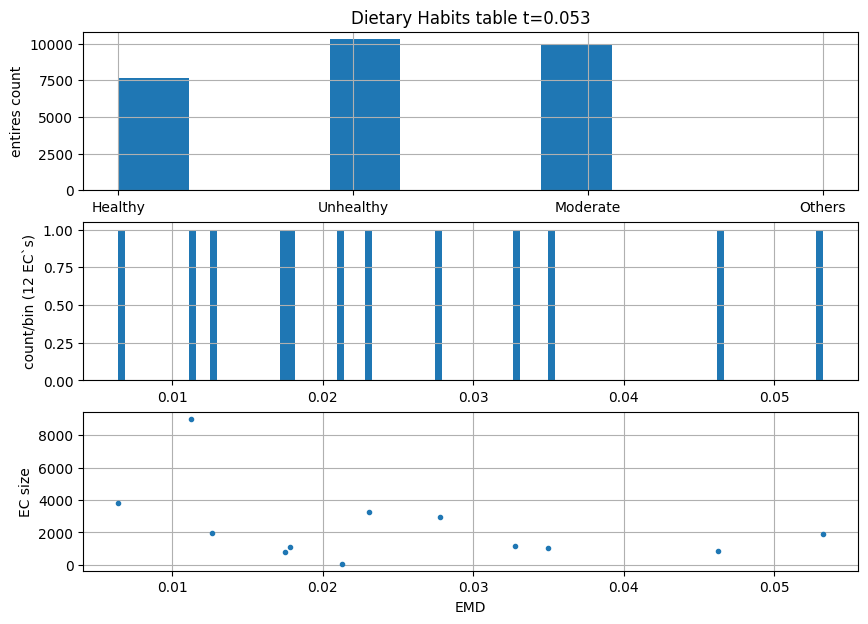

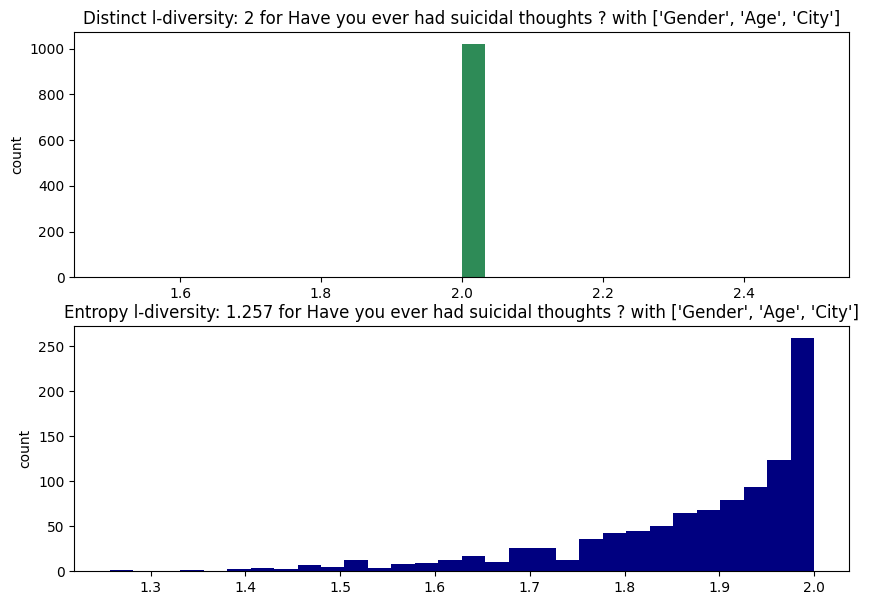

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA_binned
0,19051,"(Female,)","(18.0, 18.0)","(Agra,)",Student,3.0,0.0,6.03,4.0,0.0,Others,Unhealthy,BA,Yes,12.0,5.0,No,1,mid
1,23427,"(Female,)","(18.0, 18.0)","(Agra,)",Student,4.0,0.0,7.53,3.0,0.0,'More than 8 hours',Healthy,'Class 12',Yes,0.0,5.0,Yes,1,mid
2,29406,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,5.6,1.0,0.0,'5-6 hours',Moderate,'Class 12',No,9.0,1.0,No,0,low
3,33909,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,7.92,2.0,0.0,'Less than 5 hours',Moderate,'Class 12',No,5.0,4.0,Yes,1,mid
4,34281,"(Female,)","(18.0, 18.0)","(Agra,)",Student,2.0,0.0,7.8,3.0,0.0,'7-8 hours',Healthy,'Class 12',Yes,8.0,1.0,Yes,1,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,110722,"(Male, Female)","(32.0, 32.0)","(Faridabad,)",Student,5.0,0.0,5.82,5.0,0.0,'5-6 hours',Unhealthy,M.Com,Yes,2.0,5.0,Yes,1,low
27840,124033,"(Male, Female)","(32.0, 32.0)","(Faridabad,)",Student,3.0,0.0,7.48,4.0,0.0,'More than 8 hours',Healthy,M.Com,No,5.0,4.0,Yes,0,mid
27841,124104,"(Male, Female)","(32.0, 32.0)","(Faridabad,)",Student,4.0,0.0,8.28,3.0,0.0,'7-8 hours',Healthy,B.Com,Yes,10.0,2.0,No,1,high
27842,131089,"(Male, Female)","(32.0, 32.0)","(Faridabad,)",Student,5.0,0.0,5.64,1.0,0.0,'Less than 5 hours',Moderate,MBBS,No,6.0,5.0,No,1,low


t is: 0.452


,Gender,Age,City,EMD,count
0,"(Female,)","(18.0, 18.0)","(Agra,)",0.072532,17
1,"(Female,)","(18.0, 18.0)","(Ahmedabad,)",0.176174,21
2,"(Female,)","(18.0, 18.0)","(Bangalore,)",0.230286,22
3,"(Female,)","(18.0, 18.0)","(Bhopal,)",0.216650,20
4,"(Female,)","(18.0, 18.0)","(Chennai,)",0.033317,30
...,...,...,...,...,...
1016,"(Male,)","(34.0, 34.0)","(Vasai-Virar,)",0.244461,54
1017,"(Male,)","(34.0, 34.0)","(Visakhapatnam,)",0.100017,30
1018,"(Male, Female)","(20.0, 34.0)","(Mihir, Mira)",0.133350,2
1019,"(Male, Female)","(21.0, 31.0)","(Harsh, Harsha)",0.033317,3


,Gender,Age,City,l (Financial Stress)
0,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Ghaziabad, Chennai, Harsha, Agra, ...",6
1,"(Male, Female)","(18.0, 34.0)","(Jaipur, Kolkata, Kibara, Khaziabad, Kalyan, I...",6
2,"(Male, Female)","(18.0, 34.0)","(Meerut, Patna, Varanasi, Rajkot, Mumbai, Visa...",6


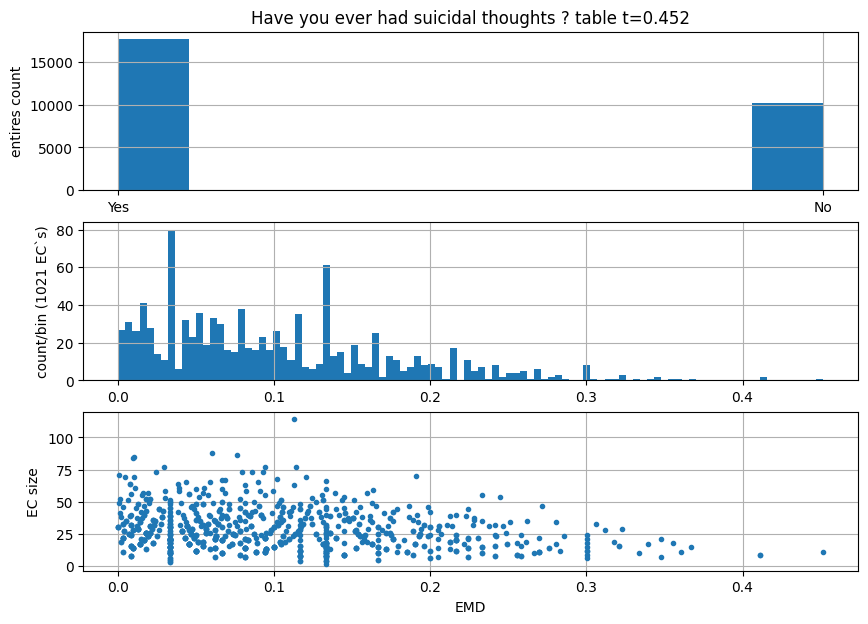

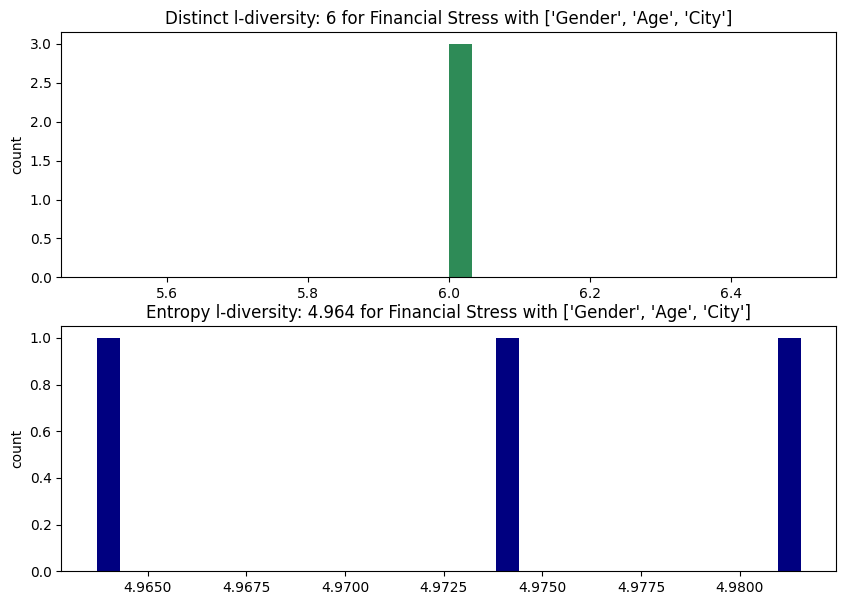

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA_binned
0,8,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Ghaziabad, Chennai, Harsha, Agra, ...",Student,2.0,0.0,5.9,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0,low
1,56,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Ghaziabad, Chennai, Harsha, Agra, ...",Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0,high
2,132,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Ghaziabad, Chennai, Harsha, Agra, ...",Student,5.0,0.0,7.25,3.0,0.0,'5-6 hours',Healthy,'Class 12',Yes,10.0,3.0,No,1,mid
3,139,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Ghaziabad, Chennai, Harsha, Agra, ...",Student,2.0,0.0,7.83,2.0,0.0,'7-8 hours',Unhealthy,'Class 12',No,6.0,3.0,No,0,mid
4,166,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Ghaziabad, Chennai, Harsha, Agra, ...",Student,3.0,0.0,5.57,3.0,0.0,'More than 8 hours',Unhealthy,MSc,Yes,10.0,5.0,No,1,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,140684,"(Male, Female)","(18.0, 34.0)","(Meerut, Patna, Varanasi, Rajkot, Mumbai, Visa...",Student,2.0,0.0,7.27,5.0,0.0,'7-8 hours',Moderate,B.Com,Yes,6.0,1.0,Yes,0,mid
27840,140685,"(Male, Female)","(18.0, 34.0)","(Meerut, Patna, Varanasi, Rajkot, Mumbai, Visa...",Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0,low
27841,140686,"(Male, Female)","(18.0, 34.0)","(Meerut, Patna, Varanasi, Rajkot, Mumbai, Visa...",Student,2.0,0.0,9.4,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0,high
27842,140690,"(Male, Female)","(18.0, 34.0)","(Meerut, Patna, Varanasi, Rajkot, Mumbai, Visa...",Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1,mid


t is: 0.015


,Gender,Age,City,EMD,count
0,"(Male, Female)","(18.0, 34.0)","(Hyderabad, Ghaziabad, Chennai, Harsha, Agra, ...",0.014595,7938
1,"(Male, Female)","(18.0, 34.0)","(Jaipur, Kolkata, Kibara, Khaziabad, Kalyan, I...",0.014460,4920
2,"(Male, Female)","(18.0, 34.0)","(Meerut, Patna, Varanasi, Rajkot, Mumbai, Visa...",0.006685,14986


,Gender,Age,City,l (Family History of Mental Illness)
0,"(Female,)","(18.0, 18.0)","(Agra,)",2
1,"(Female,)","(18.0, 18.0)","(Ahmedabad,)",2
2,"(Female,)","(18.0, 18.0)","(Bangalore,)",2
3,"(Female,)","(18.0, 18.0)","(Bhopal,)",2
4,"(Female,)","(18.0, 18.0)","(Chennai,)",2
...,...,...,...,...
1019,"(Male, Female)","(20.0, 34.0)","(Mihir, Mira)",2
1020,"(Male, Female)","(21.0, 27.0)","(Kibara, Khaziabad)",2
1021,"(Male, Female)","(21.0, 31.0)","(Harsh, Harsha)",2
1022,"(Male, Female)","(23.0, 31.0)","(Nalyan, Nalini)",2


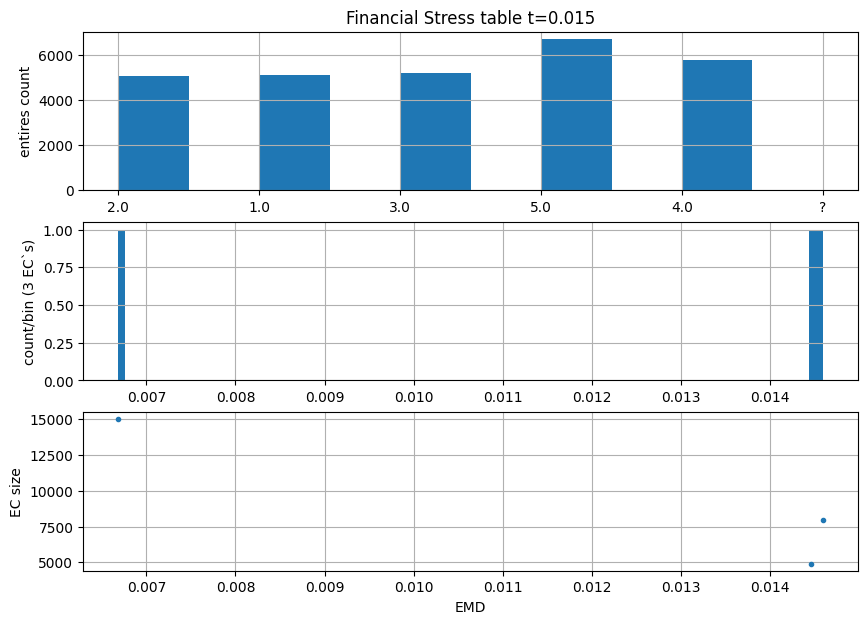

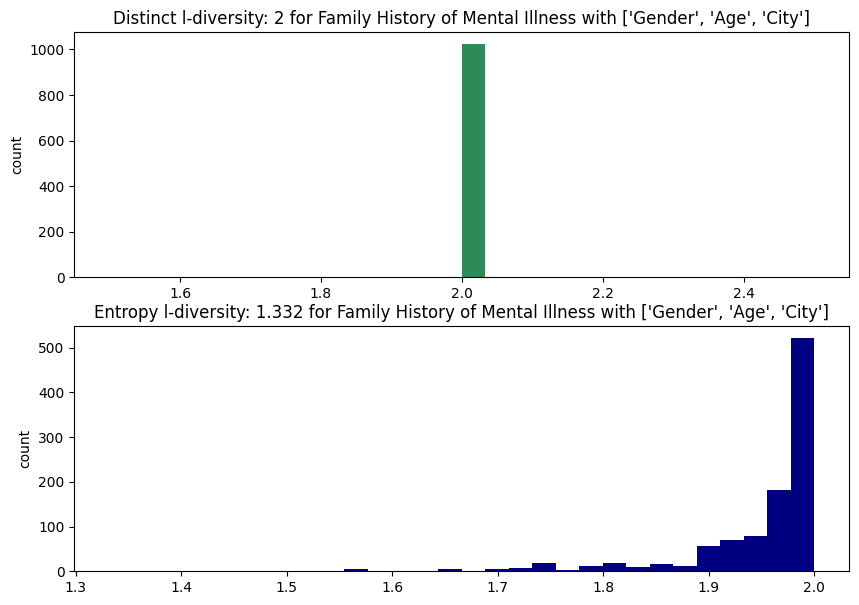

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA_binned
0,19051,"(Female,)","(18.0, 18.0)","(Agra,)",Student,3.0,0.0,6.03,4.0,0.0,Others,Unhealthy,BA,Yes,12.0,5.0,No,1,mid
1,23427,"(Female,)","(18.0, 18.0)","(Agra,)",Student,4.0,0.0,7.53,3.0,0.0,'More than 8 hours',Healthy,'Class 12',Yes,0.0,5.0,Yes,1,mid
2,29406,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,5.6,1.0,0.0,'5-6 hours',Moderate,'Class 12',No,9.0,1.0,No,0,low
3,33909,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,7.92,2.0,0.0,'Less than 5 hours',Moderate,'Class 12',No,5.0,4.0,Yes,1,mid
4,34281,"(Female,)","(18.0, 18.0)","(Agra,)",Student,2.0,0.0,7.8,3.0,0.0,'7-8 hours',Healthy,'Class 12',Yes,8.0,1.0,Yes,1,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,109611,"(Male, Female)","(26.0, 26.0)","(Nashik,)",Student,1.0,0.0,8.88,5.0,0.0,'Less than 5 hours',Moderate,MBBS,No,8.0,1.0,Yes,0,high
27840,113682,"(Male, Female)","(26.0, 26.0)","(Nashik,)",Student,4.0,0.0,8.04,2.0,0.0,'7-8 hours',Unhealthy,MSc,Yes,3.0,1.0,Yes,1,high
27841,114703,"(Male, Female)","(26.0, 26.0)","(Nashik,)",Student,4.0,0.0,6.61,2.0,0.0,'7-8 hours',Moderate,MSc,No,5.0,4.0,No,1,mid
27842,138172,"(Male, Female)","(26.0, 26.0)","(Nashik,)",Student,2.0,0.0,7.75,4.0,0.0,'5-6 hours',Moderate,M.Ed,Yes,11.0,1.0,Yes,1,mid


t is: 0.400


,Gender,Age,City,EMD,count
0,"(Female,)","(18.0, 18.0)","(Agra,)",0.104433,17
1,"(Female,)","(18.0, 18.0)","(Ahmedabad,)",0.040007,21
2,"(Female,)","(18.0, 18.0)","(Bangalore,)",0.016197,22
3,"(Female,)","(18.0, 18.0)","(Bhopal,)",0.066197,20
4,"(Female,)","(18.0, 18.0)","(Chennai,)",0.017136,30
...,...,...,...,...,...
1019,"(Male, Female)","(20.0, 34.0)","(Mihir, Mira)",0.016197,2
1020,"(Male, Female)","(21.0, 27.0)","(Kibara, Khaziabad)",0.016197,2
1021,"(Male, Female)","(21.0, 31.0)","(Harsh, Harsha)",0.150469,3
1022,"(Male, Female)","(23.0, 31.0)","(Nalyan, Nalini)",0.016197,2


,Gender,Age,City,l (Depression)
0,"(Female,)","(18.0, 18.0)","(Agra,)",2
1,"(Female,)","(18.0, 18.0)","(Ahmedabad,)",2
2,"(Female,)","(18.0, 18.0)","(Bangalore,)",2
3,"(Female,)","(18.0, 18.0)","(Bhopal,)",2
4,"(Female,)","(18.0, 18.0)","(Chennai,)",2
...,...,...,...,...
1014,"(Male, Female)","(21.0, 27.0)","(Kibara, Khaziabad)",2
1015,"(Male, Female)","(21.0, 31.0)","(Harsh, Harsha)",2
1016,"(Male, Female)","(23.0, 31.0)","(Nalyan, Nalini)",2
1017,"(Male, Female)","(26.0, 26.0)","(Nashik,)",2


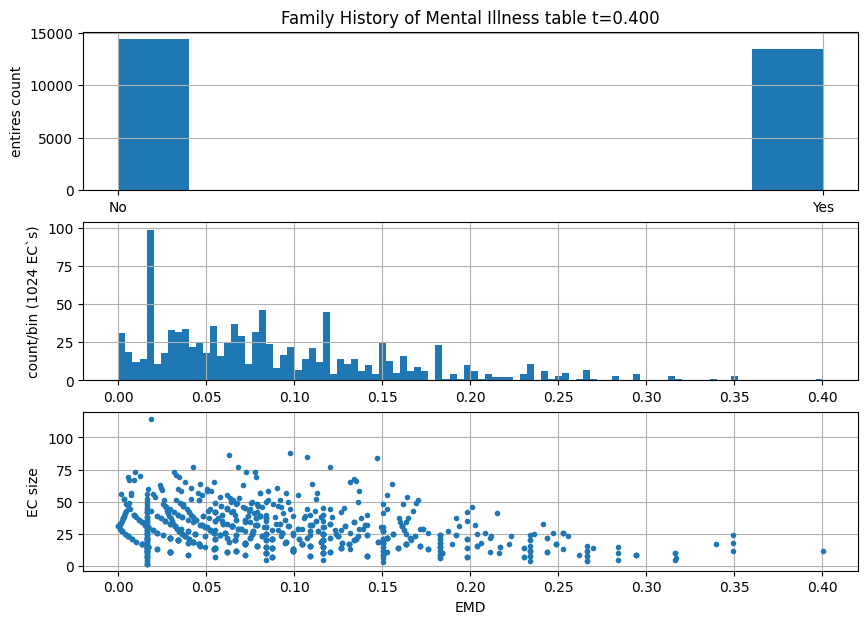

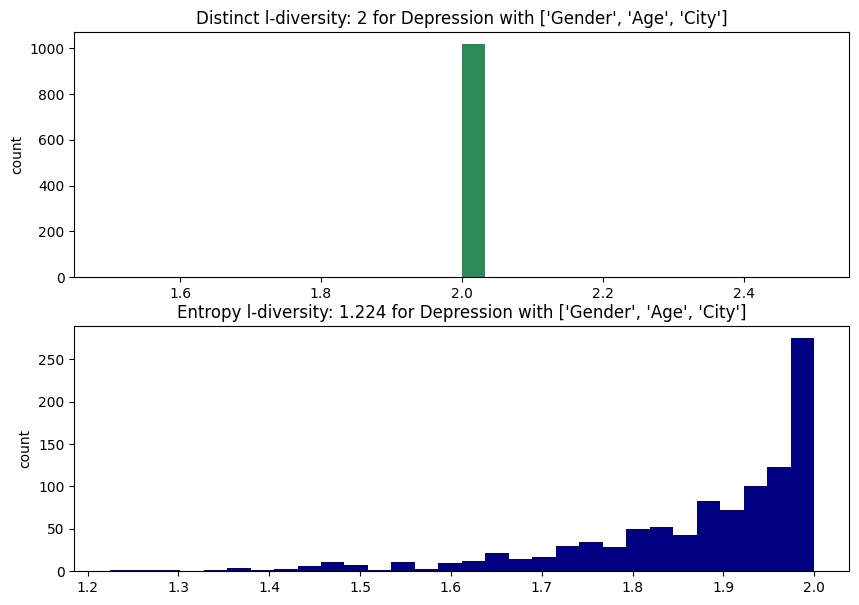

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,CGPA_binned
0,19051,"(Female,)","(18.0, 18.0)","(Agra,)",Student,3.0,0.0,6.03,4.0,0.0,Others,Unhealthy,BA,Yes,12.0,5.0,No,1,mid
1,23427,"(Female,)","(18.0, 18.0)","(Agra,)",Student,4.0,0.0,7.53,3.0,0.0,'More than 8 hours',Healthy,'Class 12',Yes,0.0,5.0,Yes,1,mid
2,29406,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,5.6,1.0,0.0,'5-6 hours',Moderate,'Class 12',No,9.0,1.0,No,0,low
3,33909,"(Female,)","(18.0, 18.0)","(Agra,)",Student,5.0,0.0,7.92,2.0,0.0,'Less than 5 hours',Moderate,'Class 12',No,5.0,4.0,Yes,1,mid
4,34281,"(Female,)","(18.0, 18.0)","(Agra,)",Student,2.0,0.0,7.8,3.0,0.0,'7-8 hours',Healthy,'Class 12',Yes,8.0,1.0,Yes,1,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27839,120295,"(Male, Female)","(26.0, 26.0)","(Varanasi,)",Student,4.0,0.0,9.6,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,0.0,4.0,No,1,high
27840,122403,"(Male, Female)","(26.0, 26.0)","(Varanasi,)",Student,5.0,0.0,6.21,4.0,0.0,'Less than 5 hours',Unhealthy,M.Com,Yes,3.0,1.0,Yes,1,mid
27841,134858,"(Male, Female)","(26.0, 26.0)","(Varanasi,)",Student,4.0,0.0,7.09,1.0,0.0,'More than 8 hours',Unhealthy,BCA,No,7.0,2.0,No,0,mid
27842,134892,"(Male, Female)","(26.0, 26.0)","(Varanasi,)",Student,2.0,0.0,8.17,4.0,0.0,'More than 8 hours',Healthy,M.Com,No,3.0,4.0,No,0,high


t is: 0.519


,Gender,Age,City,EMD,count
0,"(Female,)","(18.0, 18.0)","(Agra,)",0.119760,17
1,"(Female,)","(18.0, 18.0)","(Ahmedabad,)",0.271020,21
2,"(Female,)","(18.0, 18.0)","(Bangalore,)",0.277514,22
3,"(Female,)","(18.0, 18.0)","(Bhopal,)",0.213877,20
4,"(Female,)","(18.0, 18.0)","(Chennai,)",0.180544,30
...,...,...,...,...,...
1014,"(Male, Female)","(21.0, 27.0)","(Kibara, Khaziabad)",0.086123,2
1015,"(Male, Female)","(21.0, 31.0)","(Harsh, Harsha)",0.080544,3
1016,"(Male, Female)","(23.0, 31.0)","(Nalyan, Nalini)",0.086123,2
1017,"(Male, Female)","(26.0, 26.0)","(Nashik,)",0.119456,15


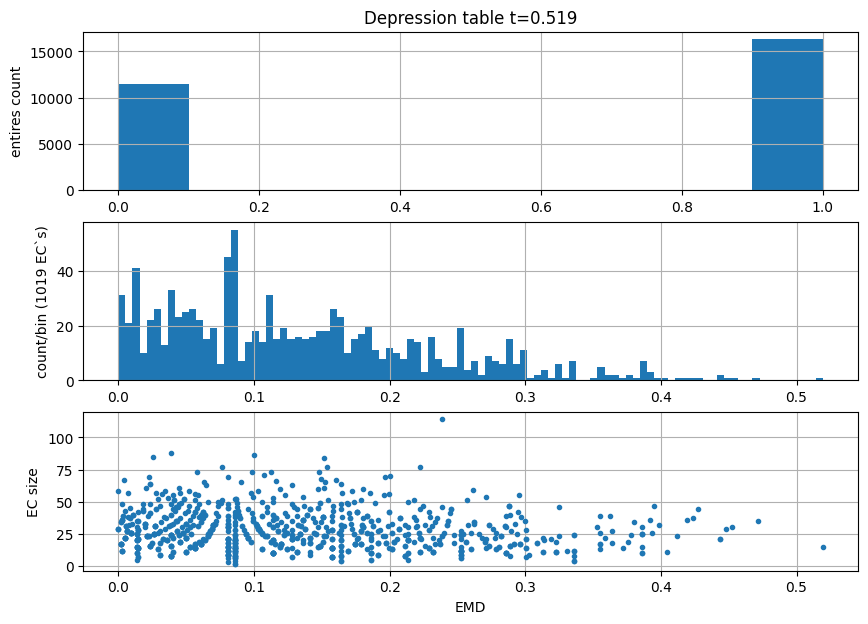

In [51]:


def l_and_t_unordered(sensAttrs):

    
    for s,desired_l in sensAttrs.items():
    
        generalized_df, boundaries = Mondrian_l_diversity(df, qID, s, desired_l, Mondrian_choose_dim_highest_distinct, Mondrian_choose_cut_first_split_l_diversity)

        l_div_report(generalized_df, qID,  {s:desired_l})
        display(generalized_df)

        ## The sensitivity order most sensitive to least sensitive

        ## calculate t for the table and EMD for each EC
        tt,EC_EMD = EMD_ordered_distance(generalized_df,qID,s,False)

        ## calculate the size of each EQ (using k-anon)
        k, EC_sizes = k_anonymity(generalized_df, qID)

        ## Do a left join to put the EQ sizes into the t/EMD results
        EC_EMD_reset = EC_EMD.reset_index()

        t_equivalence_classes = EC_EMD_reset.merge(EC_sizes[['Gender', 'Age', 'City', 'count']], on=['Gender', 'Age', 'City'],how='left')

        print(f"t is: {tt:.3f}")
        display(t_equivalence_classes)




        ## Plots

        ## Plot the data grade distribution
        # Reindex according to desired order
        fig = plt.figure(figsize=(10, 7))
        ax1 = fig.add_subplot(311)
        ax1.set_title(f"{s} table t={tt:.3f}")
        ax1.set_ylabel('entires count')
        generalized_df[s].hist(ax=ax1)

        ax2 = fig.add_subplot(312)
        t_equivalence_classes['EMD'].hist(bins = 100, ax=ax2)
        ax2.set_ylabel(f'count/bin ({len(t_equivalence_classes)} EC`s)')
        #ax2.set_xlabel('EMD')


        ax3 = fig.add_subplot(313)
        ax3.plot(t_equivalence_classes['EMD'],t_equivalence_classes['count'], '.')
        ax3.set_ylabel(f'EC size')
        ax3.grid('on')
        ax3.set_xlabel('EMD')


## Dict of sensitive attributes and its desired l without the continuos variables


sensAttrs = {
   'Study Satisfaction': 6,
   'Job Satisfaction': 5,
   'Sleep Duration': 5,
   'Dietary Habits': 4,
   'Have you ever had suicidal thoughts ?': 2,
   'Financial Stress': 6,
   'Family History of Mental Illness': 2,
   'Depression': 2,
}

l_and_t_unordered(sensAttrs)